In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [18]:
import pandas as pd
import sqlite3

In [19]:
file_path1 = ("C:\\Users\\yasmi\\OneDrive\\Documents\\TeluQ\\Projet data science\\Airline Passenger Satisfaction_Train.csv")

In [20]:
train_df1 = pd.read_csv(file_path1)

In [21]:
conn = sqlite3.connect(':memory:')
train_df1.to_sql('airline_satisfaction_train', conn, index=False, if_exists='replace')

103904

In [22]:
file_path2 = ("C:\\Users\\yasmi\\OneDrive\\Documents\\TeluQ\\Projet data science\\Airline Passenger Satisfaction_Test.csv")

In [23]:
test_df1 = pd.read_csv(file_path2)

In [24]:
conn = sqlite3.connect(':memory:')
test_df1.to_sql('airline_satisfaction_test', conn, index=False, if_exists='replace')

25976

In [25]:
# both dataset train_df1 & test_df1 are in SQL 

In [26]:
# airline_satisfaction_train and airline_satisfaction_test are the sql tables in python and final_df1 is the combine data 

In [27]:
# concatenate the sql datasets train_df1 & test_df1 in python as final_df1 combined data

In [28]:
final_df1 = pd.concat([train_df1, test_df1], ignore_index=True)

In [29]:
final_df1.to_csv('final_df1.csv', index=False)

In [30]:
final_df1

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
129876,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
129877,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
129878,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [31]:
print(final_df1.columns)

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')


In [32]:
print(final_df1.isnull().sum())

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction    

In [33]:
# there are is 393 missing values in this dataset from arrival delay in minutes 

In [34]:
# EDA

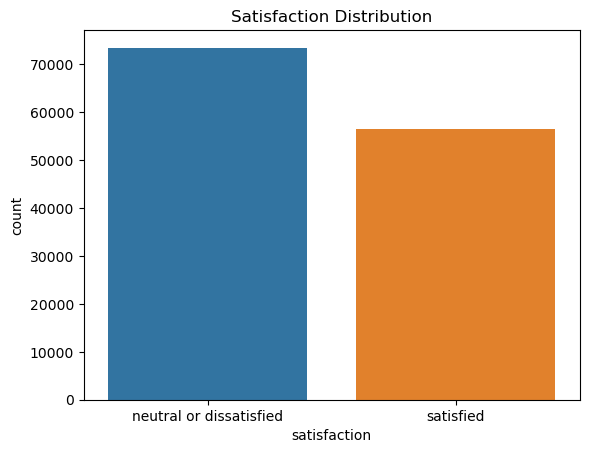

In [35]:
sns.countplot(data=final_df1, x='satisfaction')
plt.title('Satisfaction Distribution')
plt.show()

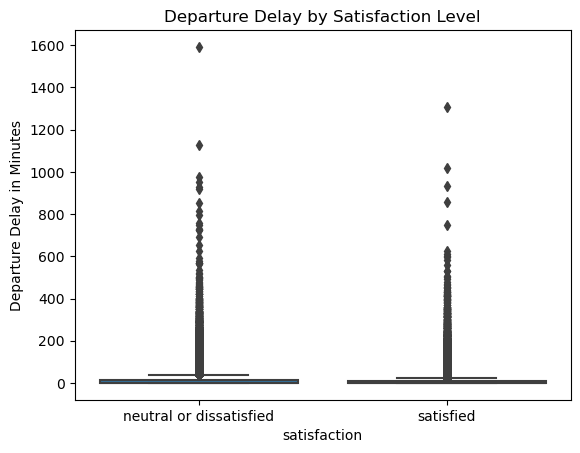

In [36]:
sns.boxplot(data=final_df1, x='satisfaction', y='Departure Delay in Minutes')
plt.title('Departure Delay by Satisfaction Level')
plt.show()

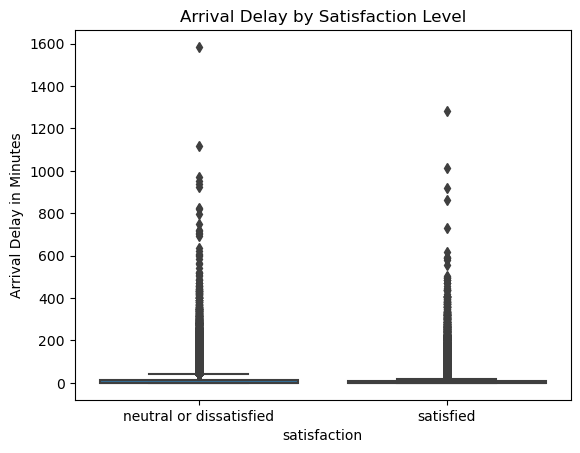

In [37]:
sns.boxplot(data=final_df1, x='satisfaction', y='Arrival Delay in Minutes')
plt.title('Arrival Delay by Satisfaction Level')
plt.show()

In [38]:
final_df1.Gender.value_counts()

Gender
Female    65899
Male      63981
Name: count, dtype: int64

In [39]:
final_df1.Class.value_counts()

Class
Business    62160
Eco         58309
Eco Plus     9411
Name: count, dtype: int64

In [40]:
final_df1['Type of Travel'].value_counts()

Type of Travel
Business travel    89693
Personal Travel    40187
Name: count, dtype: int64

In [41]:
final_df1['Customer Type'].value_counts()

Customer Type
Loyal Customer       106100
disloyal Customer     23780
Name: count, dtype: int64

In [42]:
final_df1.satisfaction.value_counts()

satisfaction
neutral or dissatisfied    73452
satisfied                  56428
Name: count, dtype: int64

In [43]:
# Check miminum value for the attribute 'Arrival Delay in Minutes'
final_df1['Arrival Delay in Minutes'].min()

0.0

In [44]:
# cleaning the data by removing the null records
final_df1 = final_df1.dropna(subset=['Arrival Delay in Minutes'])

In [45]:
# dropping the columns 'Unnamed: 0' and 'id'
final_df1 = final_df1.drop(columns=['Unnamed: 0','id'])

Gender : ['Male' 'Female']


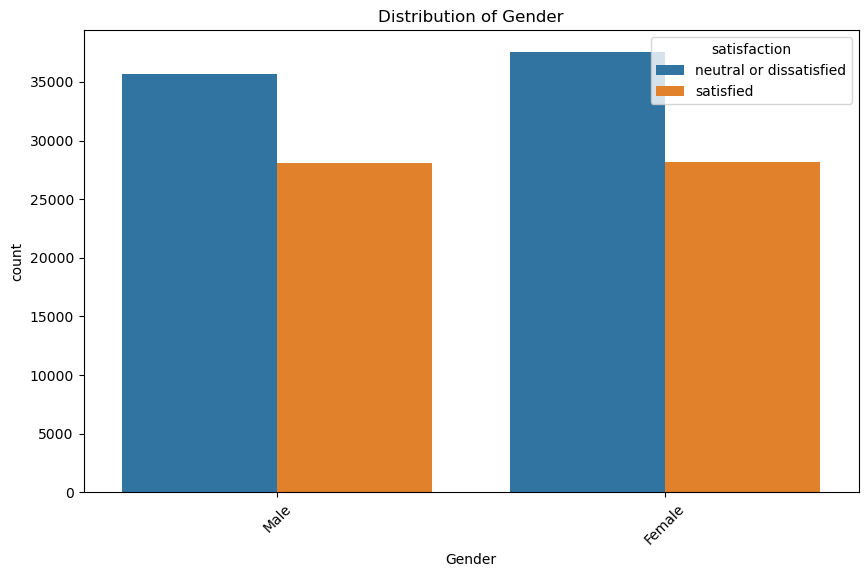

Customer Type : ['Loyal Customer' 'disloyal Customer']


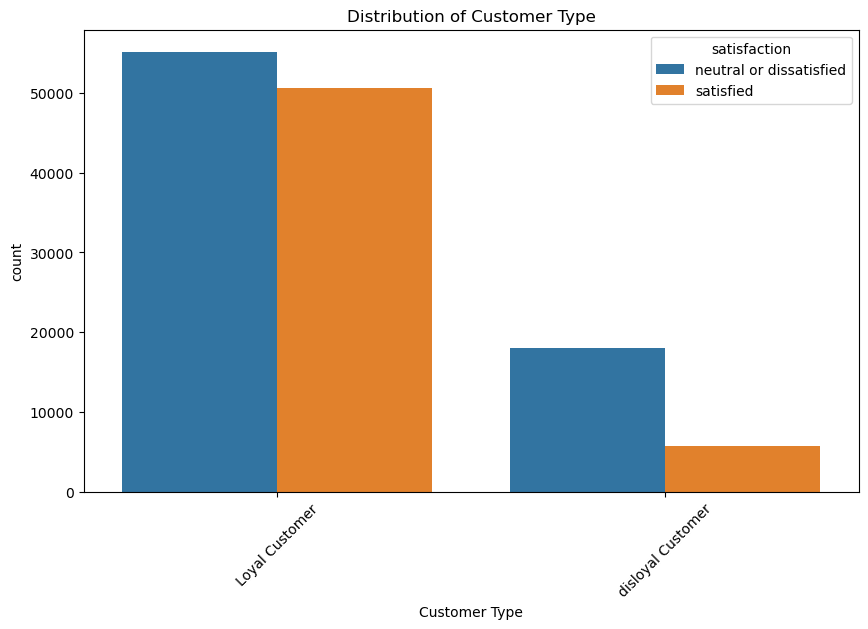

Type of Travel : ['Personal Travel' 'Business travel']


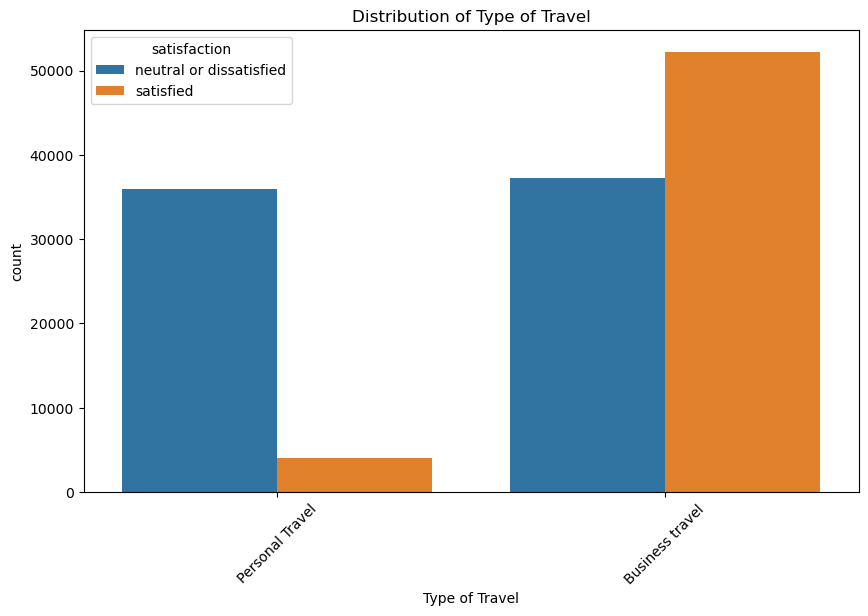

Class : ['Eco Plus' 'Business' 'Eco']


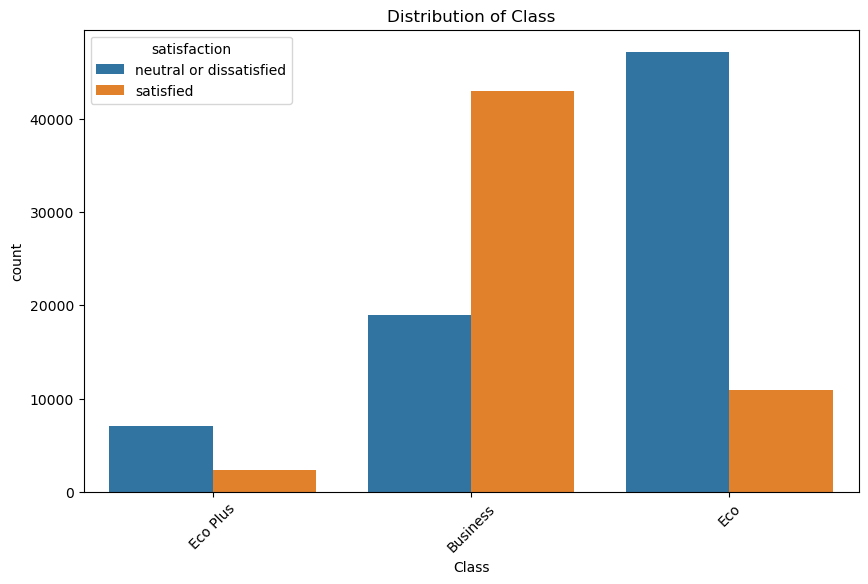

satisfaction : ['neutral or dissatisfied' 'satisfied']


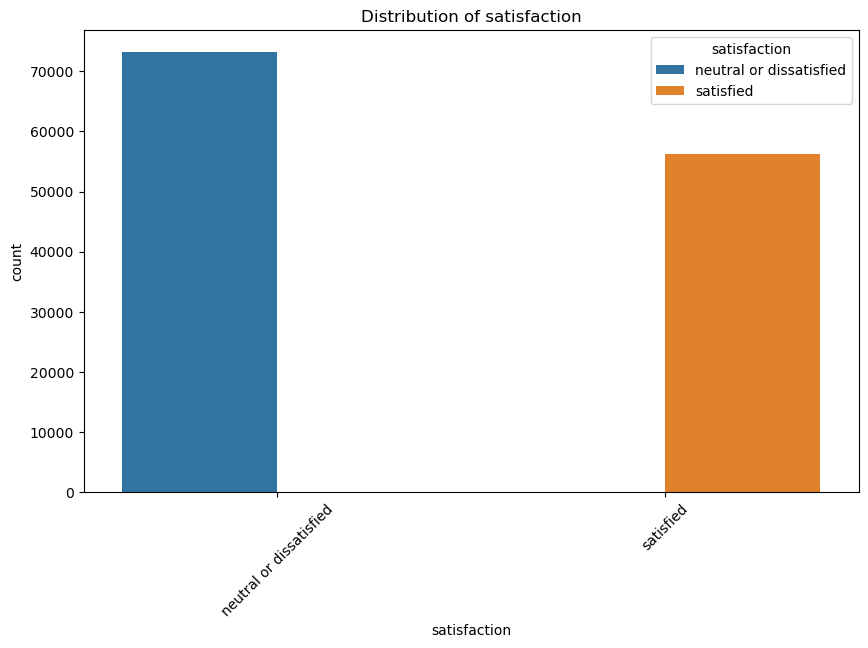

In [46]:
#distribution of all categorical columns on the dataset
categorical_col = []

for column in final_df1.columns:
    if final_df1[column].dtype == object and len(final_df1[column].unique()) <= 30:
        categorical_col.append(column)
        print(f"{column} : {final_df1[column].unique()}")
        print("====================================")
        
        # Plotting the countplot for each categorical column
        plt.figure(figsize=(10, 6))
        sns.countplot(x=column, data=final_df1, hue ='satisfaction')
        plt.title(f'Distribution of {column}')
        plt.xticks(rotation=45)
        plt.show()

Age : count    129487.000000
mean         39.428761
std          15.117597
min           7.000000
25%          27.000000
50%          40.000000
75%          51.000000
max          85.000000
Name: Age, dtype: float64


C:\Users\yasmi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


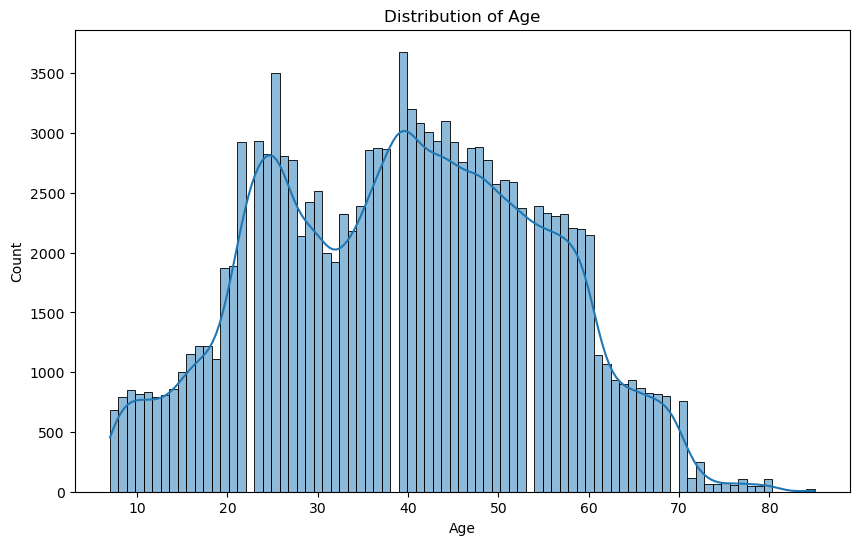

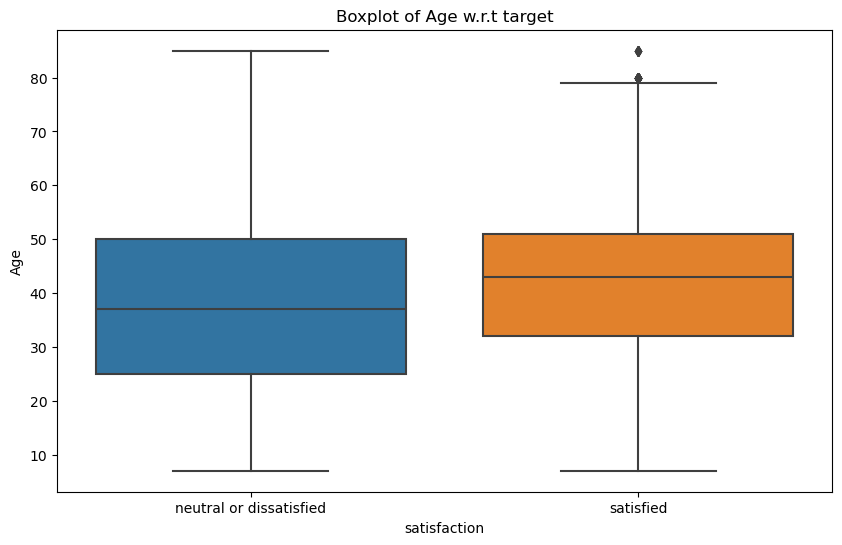

Flight Distance : count    129487.000000
mean       1190.210662
std         997.560954
min          31.000000
25%         414.000000
50%         844.000000
75%        1744.000000
max        4983.000000
Name: Flight Distance, dtype: float64


C:\Users\yasmi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


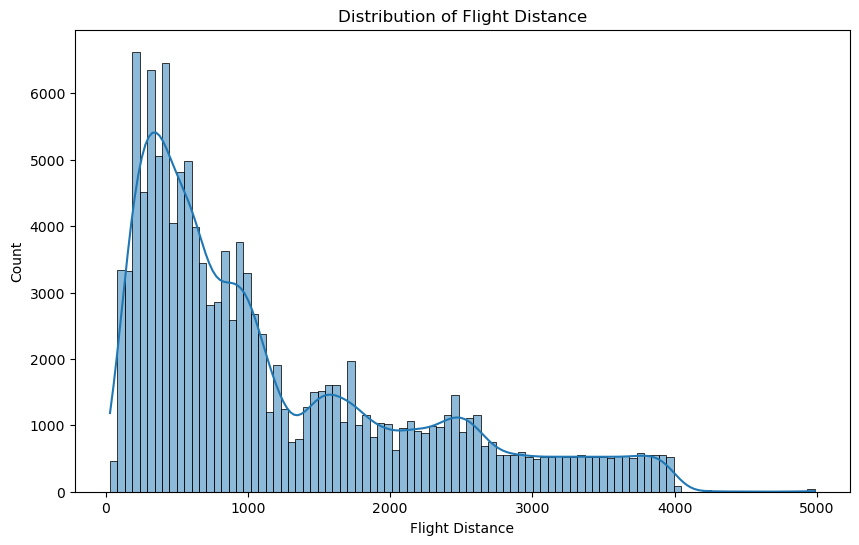

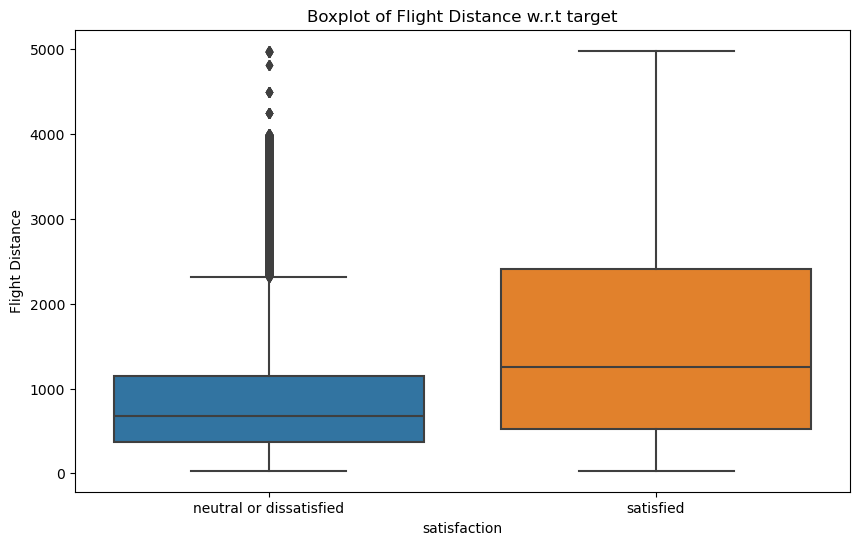

Departure Delay in Minutes : count    129487.000000
mean         14.643385
std          37.932867
min           0.000000
25%           0.000000
50%           0.000000
75%          12.000000
max        1592.000000
Name: Departure Delay in Minutes, dtype: float64


C:\Users\yasmi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


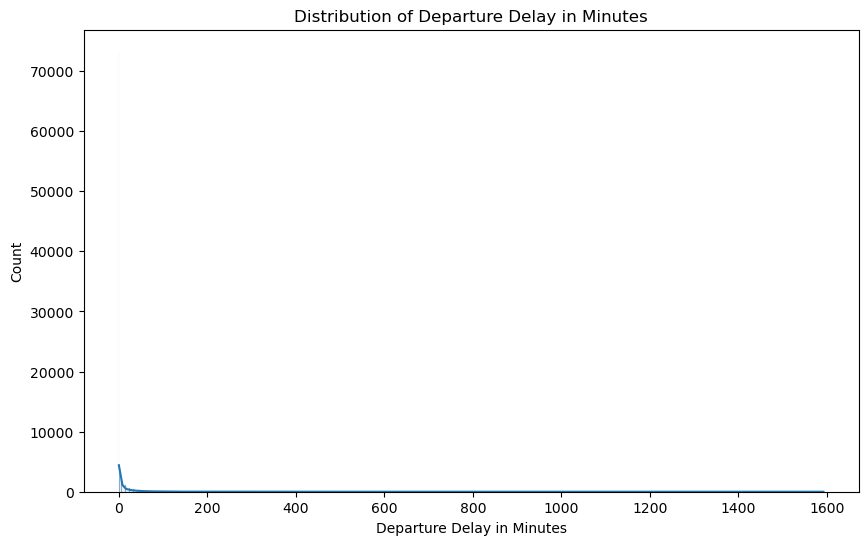

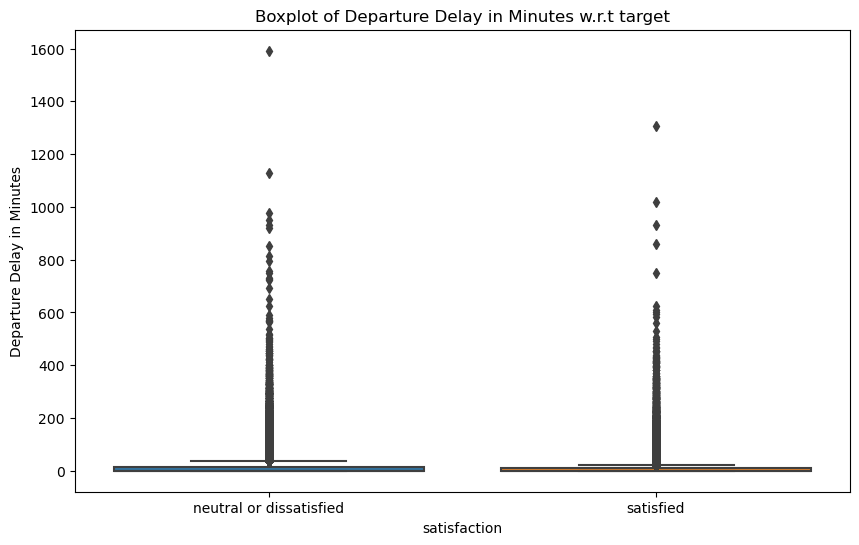

Arrival Delay in Minutes : count    129487.000000
mean         15.091129
std          38.465650
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Arrival Delay in Minutes, dtype: float64


C:\Users\yasmi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


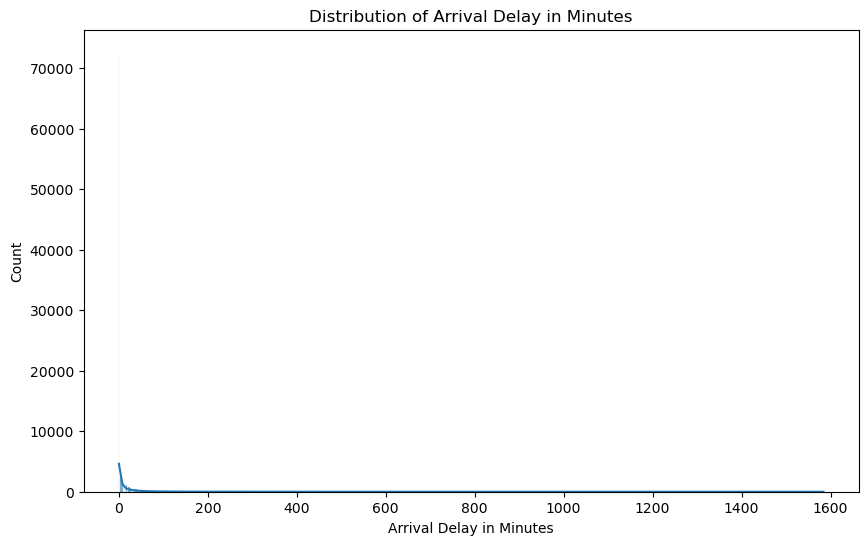

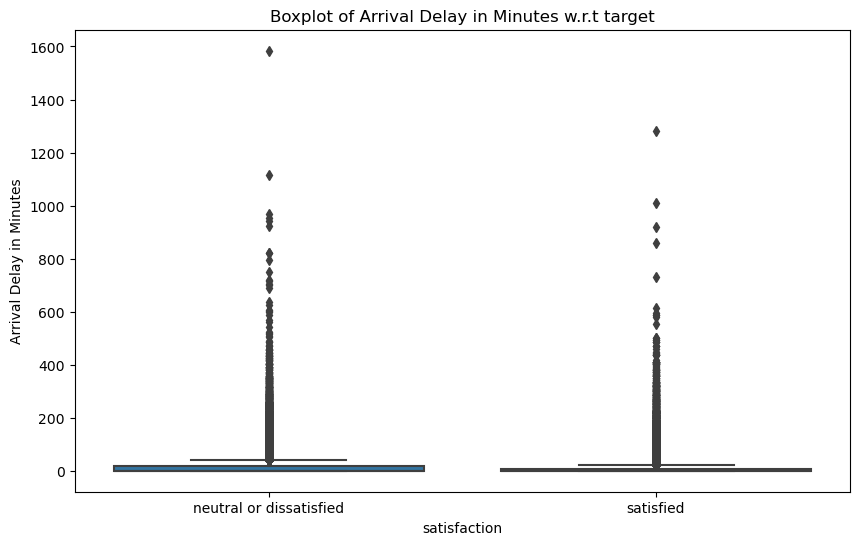

In [47]:
# distribution of all continuous columns on the dataset
continuous_col = []

for column in final_df1.columns:
    if final_df1[column].dtype != object and len(final_df1[column].unique()) > 30:
        continuous_col.append(column)
        print(f"{column} : {final_df1[column].describe()}")
        print("====================================")
        
        # Plotting the histogram for each continuous column 
        plt.figure(figsize=(10, 6))
        sns.histplot(final_df1[column], kde=True)
        plt.title(f'Distribution of {column}')
        plt.show()
        
        # Plotting the boxplot for each continuous column with respect to target vaiable = satisfaction 
        plt.figure(figsize=(10, 6))
        sns.boxplot(y=final_df1[column],x=final_df1['satisfaction'])
        plt.title(f'Boxplot of {column} w.r.t target')
        plt.show()

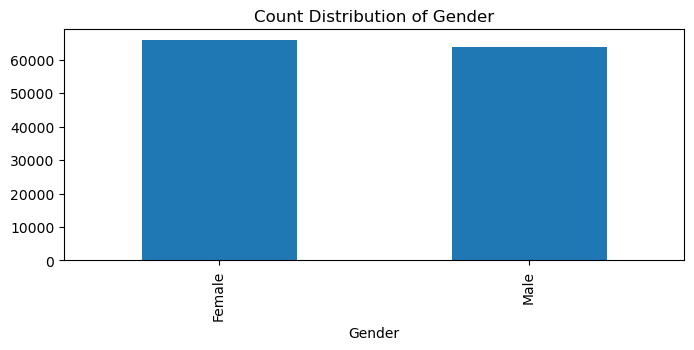

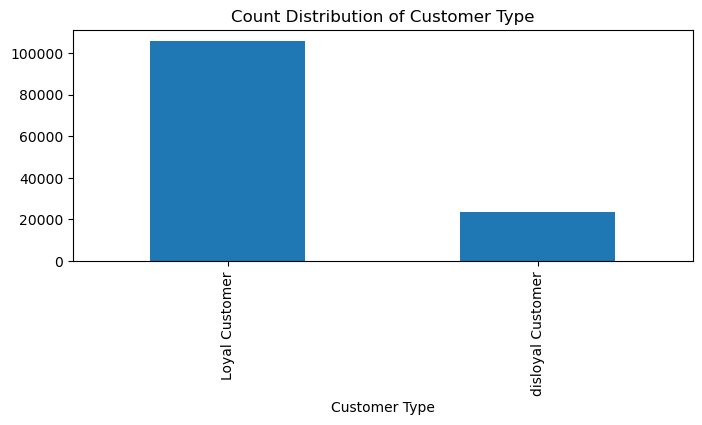

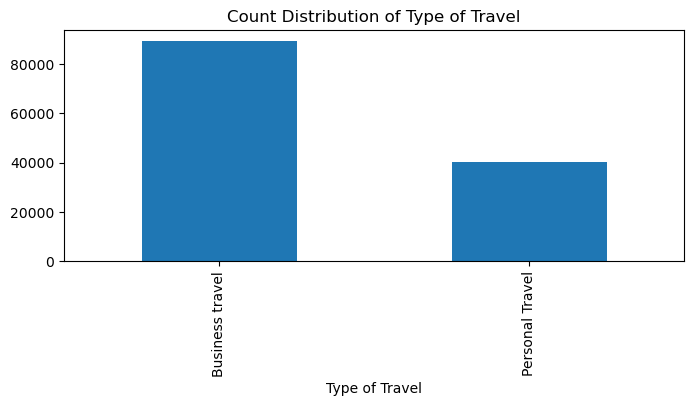

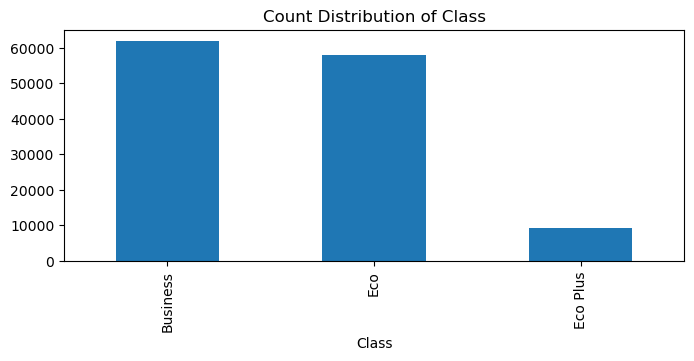

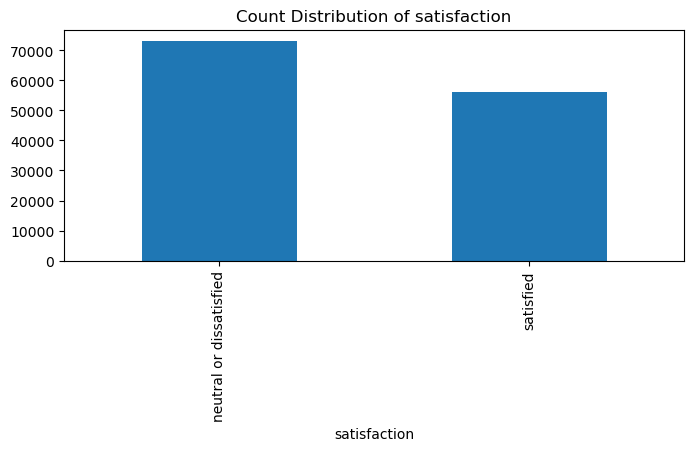

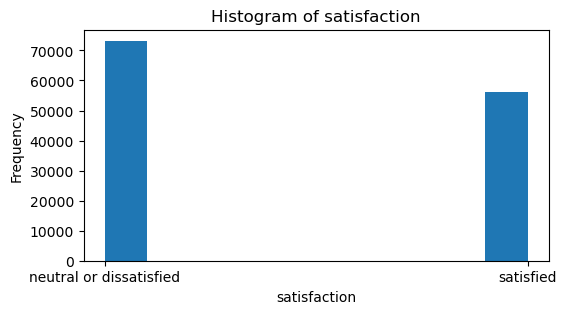

In [48]:


# plot the histograms and count distribution for all the present attributes
for column_name, column_data_type in final_df1.dtypes.items():
    if column_data_type=='object' :
        plt.figure(figsize=(6, 3))
        final_df1[column_name].value_counts()[:20].plot(kind='bar',
                                    figsize=(8,3),
                                    title="Count Distribution of "+column_name)
else:
        plt.figure(figsize=(6, 3))
        plt.hist(final_df1[column_name])
        plt.xlabel(column_name)
        plt.ylabel('Frequency')
        plt.title("Histogram of "+column_name)

In [49]:
# initial analysis reveals that more that 50 % of the customers are dissatisfied despite the indication that majority of the customers are loyal , a long with this the male and female customers are simirarly distributed 
# the median age customers is around 40 years .
# now we can try to check the distribution of the predector values with the respect of the output values 

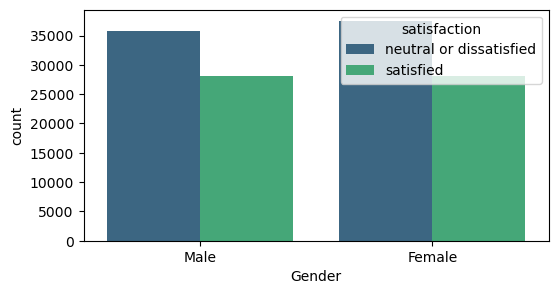

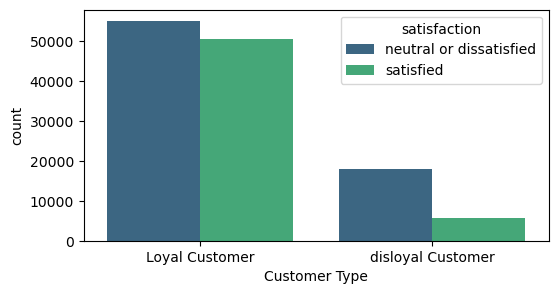

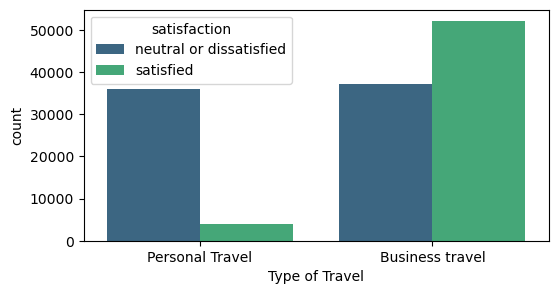

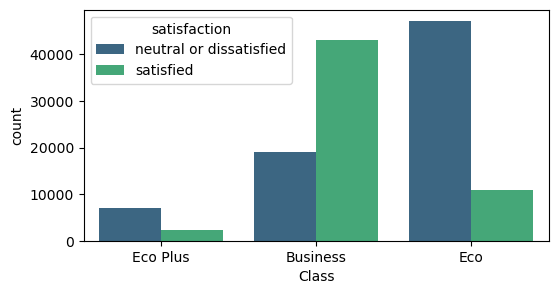

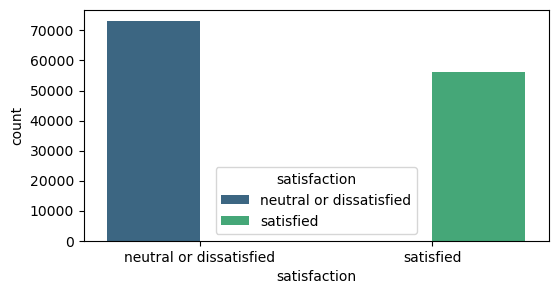

C:\Users\yasmi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


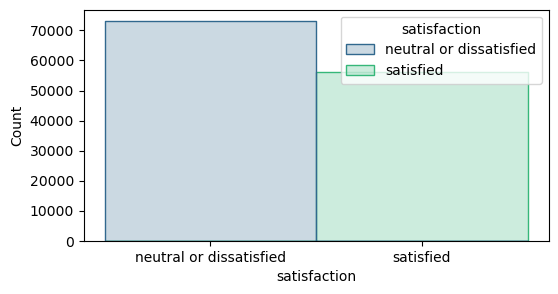

In [50]:
# plotting the distribution of the fields with respect to the satisfaction level of the customer
for column_name, column_data_type in final_df1.dtypes.items():
    if column_data_type=='object' :
        plt.figure(figsize=(6, 3))
        sns.countplot(data=final_df1,x=column_name,hue=final_df1.columns[-1],palette='viridis')
        plt.show()
else: 
        plt.figure(figsize=(6, 3))
        sns.histplot(data=final_df1,x=column_name,hue=final_df1.columns[-1],element='step',palette='viridis')
        plt.show()

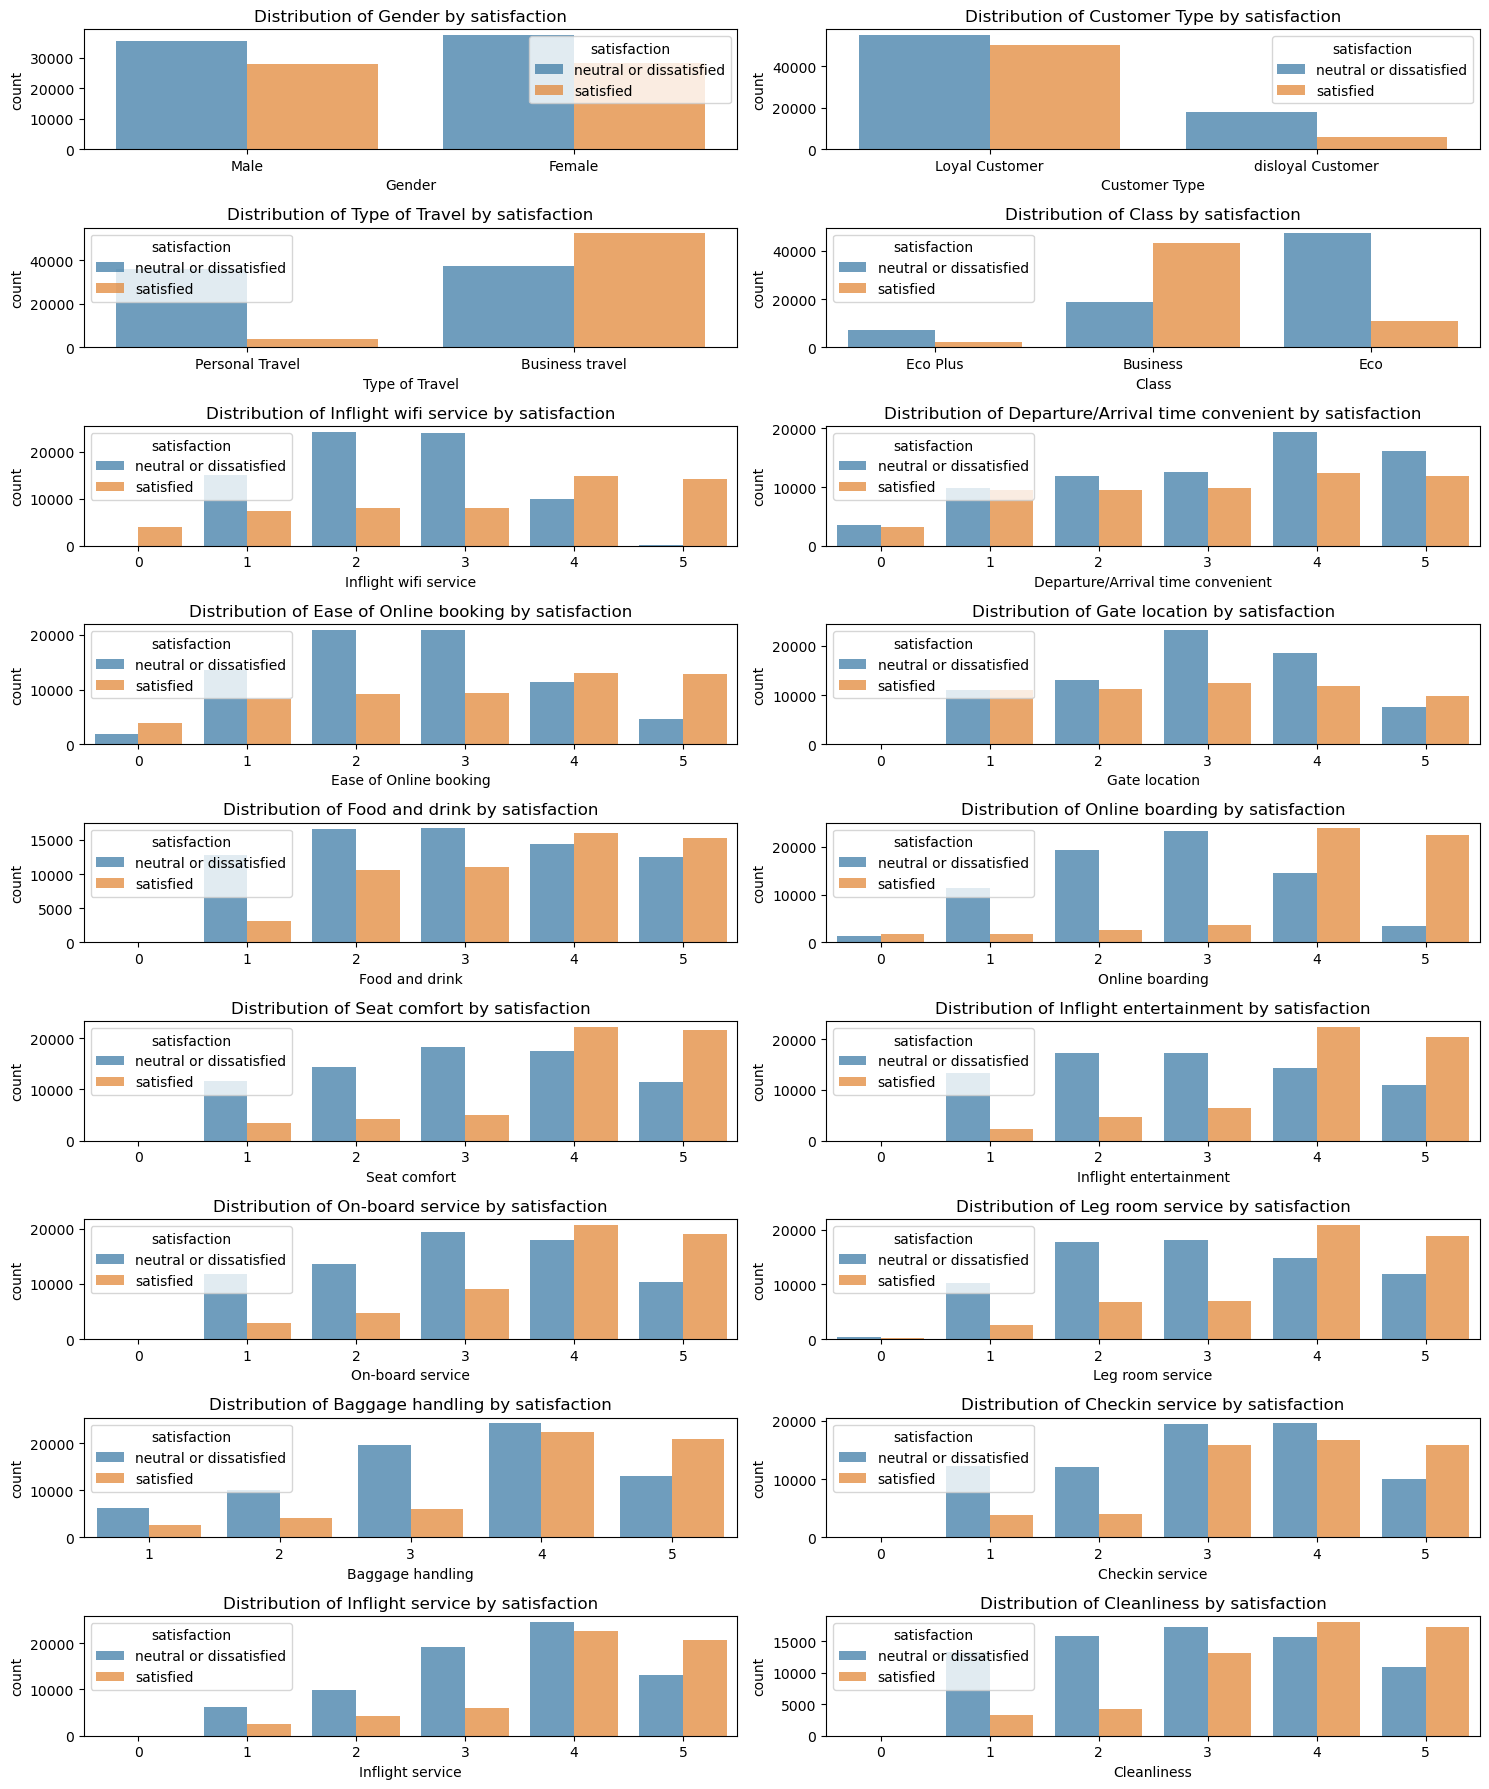

In [51]:
plt.figure(figsize=(15, 18))

features = [
    'Gender', 'Customer Type', 'Type of Travel', 'Class',
    'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking',
    'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
    'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling',
    'Checkin service', 'Inflight service', 'Cleanliness'
]
n = 1
for f in features:
    plt.subplot(9, 2, n)
    sns.countplot(x=f, hue='satisfaction', alpha=0.7, data=final_df1)
    plt.title(f"Distribution of {f} by satisfaction")
    n += 1

plt.tight_layout()
plt.show()

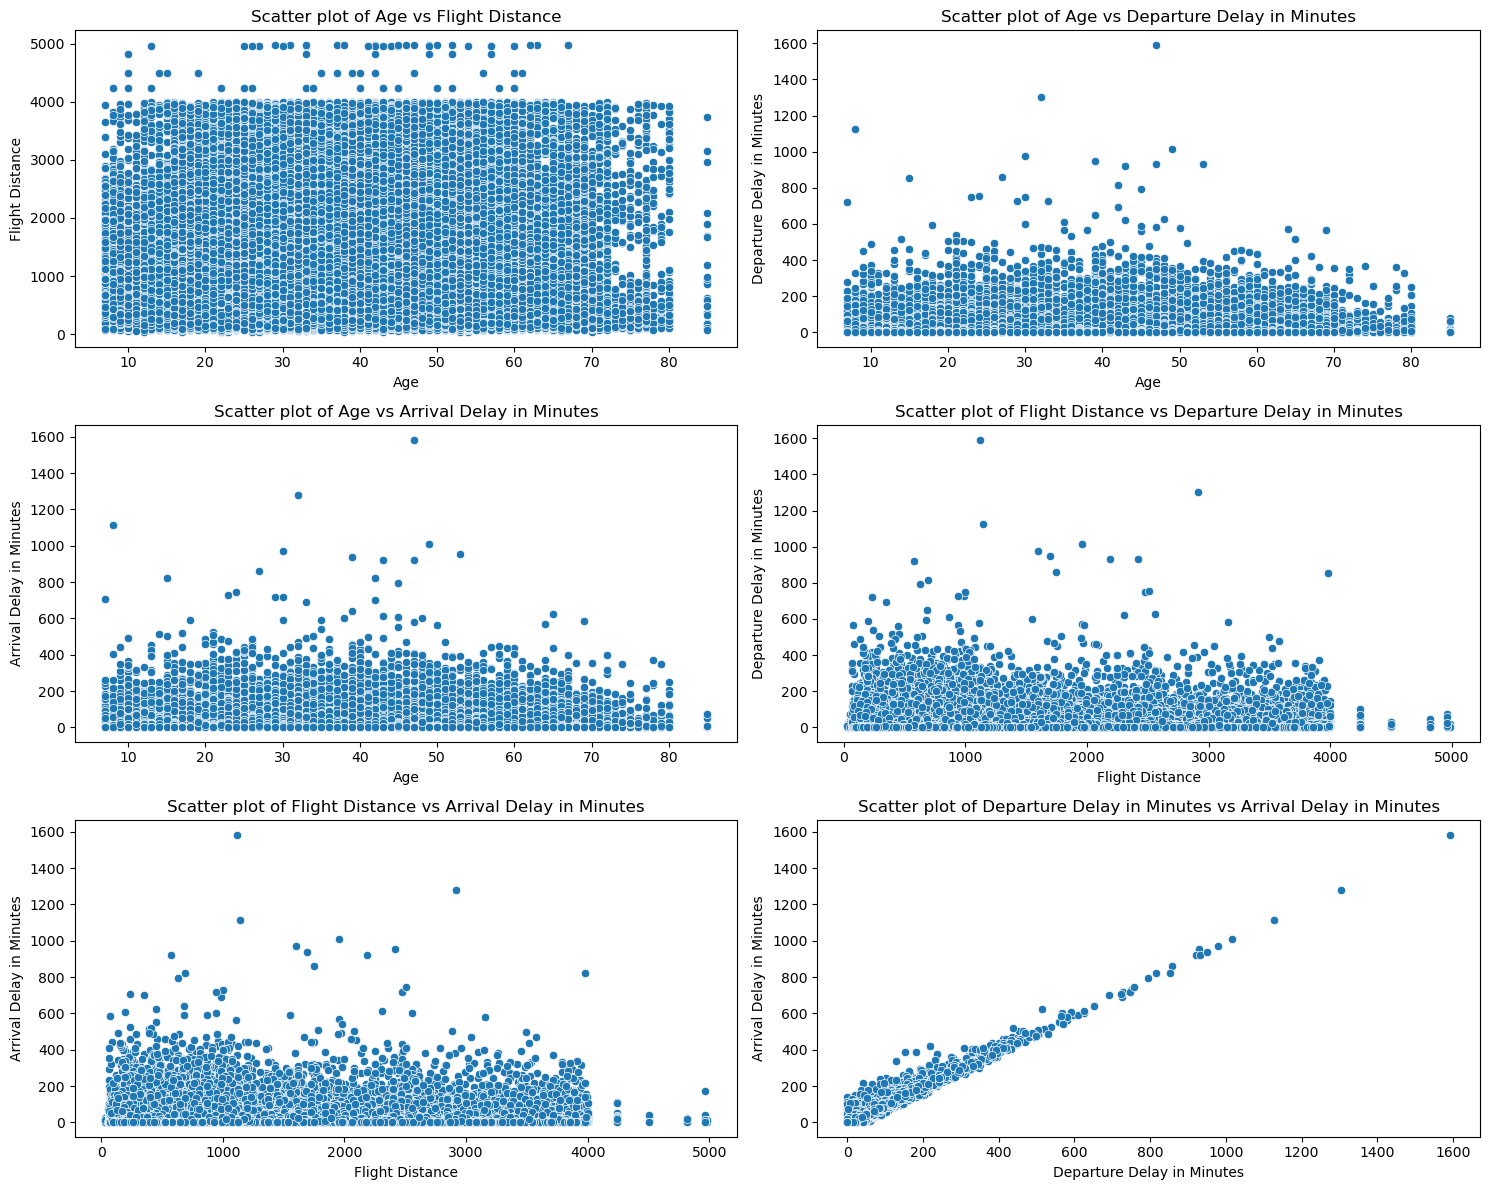

In [52]:
# Defining the features
features = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

# Defining the pairs of features
feature_pairs = [(features[i], features[j]) for i in range(len(features)) for j in range(i+1, len(features))]

# Plotting scatter plots for each pair
plt.figure(figsize=(15, 12))
for i, (x_feature, y_feature) in enumerate(feature_pairs):
    plt.subplot(3, 2, i+1)
    sns.scatterplot(x=x_feature, y=y_feature, data=final_df1)
    plt.title(f'Scatter plot of {x_feature} vs {y_feature}')

plt.tight_layout()
plt.show()

In [53]:
# This loop iterates over each pair of features, creating a scatter plot for each.
# plt.subplot(3, 2, i+1) organizes the plots in a grid layout with 3 rows and 2 columns.
# sns.scatterplot is used to create the actual scatter plot for the current pair of features
# plt.title sets the title for each subplot to indicate which features are being plotted.
# plt.tight_layout() adjusts the spacing between subplots to ensure that they don’t overlap and are neatly arranged.
# plt.show() displays the final figure containing all the scatter plots.
# Insights:
# By generating scatter plots for each pair of features, we can visually explore relationships or patterns between them.
# We can identify correlations, outliers, or any potential interactions that may exist between the features.

In [54]:
# distribution of age bucket with respect to satisfaction variable with a help of a catplot ( categorical plot) 

C:\Users\yasmi\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\yasmi\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\yasmi\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
 

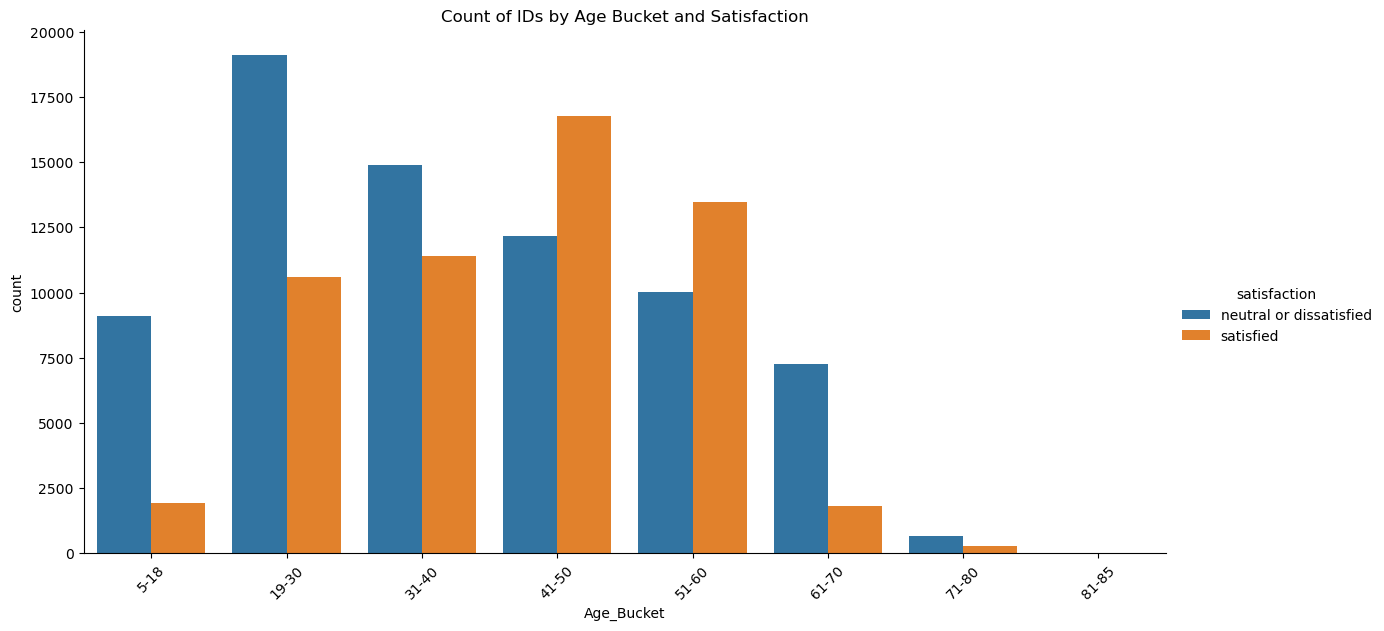

In [55]:
sorted_df = final_df1.sort_values(by='Age')

sorted_df['Age_Bucket'] = pd.cut(sorted_df['Age'], bins=[5, 18, 30, 40, 50, 60, 70, 80, 85], labels=['5-18', '19-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-85'])

sns.catplot(x='Age_Bucket', kind='count', hue='satisfaction', data=sorted_df, height=6, aspect=2)
plt.title('Count of IDs by Age Bucket and Satisfaction')
plt.xticks(rotation=45)
plt.show()

In [56]:
# creating bucket for flight distance 

C:\Users\yasmi\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\yasmi\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\yasmi\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
 

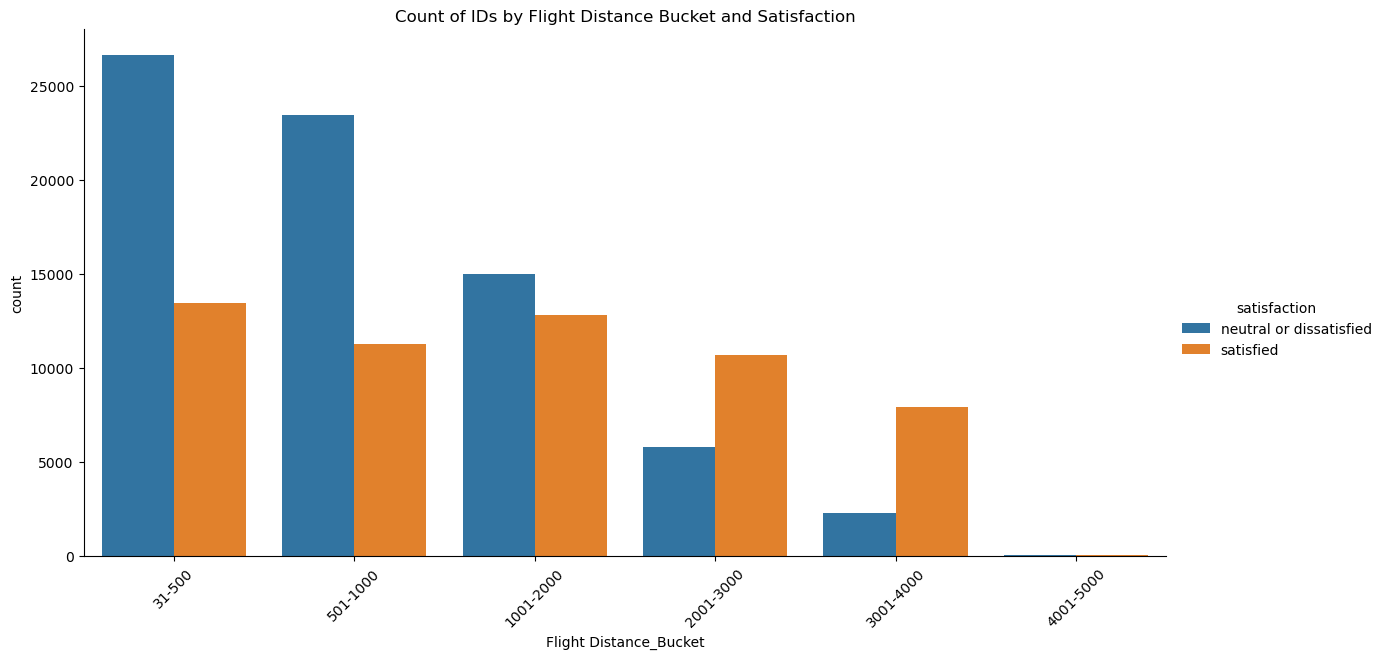

In [57]:
sorted_df = final_df1.sort_values(by='Flight Distance')

sorted_df['Flight Distance_Bucket'] = pd.cut(sorted_df['Flight Distance'], bins=[31, 500, 1000, 2000, 3000, 4000, 5000], labels=['31-500', '501-1000', '1001-2000', '2001-3000', '3001-4000', '4001-5000'])

sns.catplot(x='Flight Distance_Bucket', kind='count', hue='satisfaction', data=sorted_df, height=6, aspect=2)
plt.title('Count of IDs by Flight Distance Bucket and Satisfaction')
plt.xticks(rotation=45)
plt.show()

C:\Users\yasmi\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\yasmi\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\yasmi\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
 

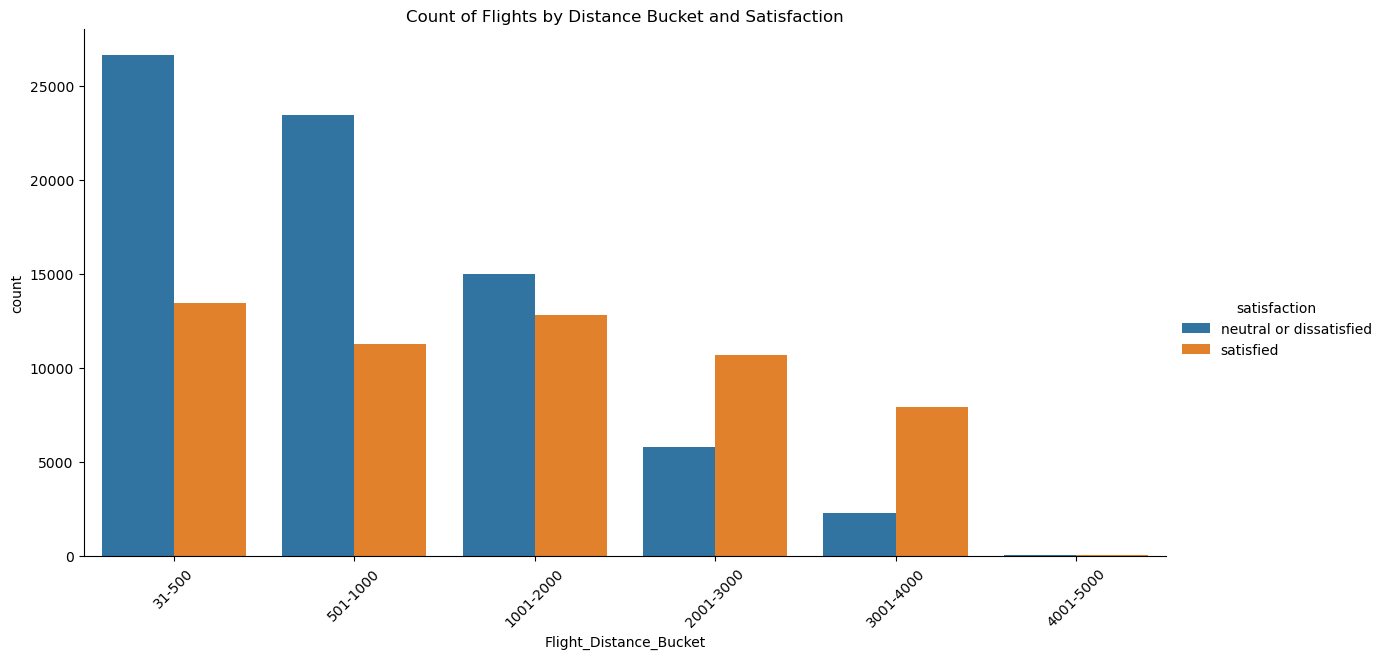

In [58]:
sorted_df_flight_distance = final_df1.sort_values(by='Flight Distance')

bins = [31, 500, 1000, 2000, 3000, 4000, 5000]
labels = ['31-500', '501-1000', '1001-2000', '2001-3000', '3001-4000', '4001-5000']
sorted_df_flight_distance['Flight_Distance_Bucket'] = pd.cut(sorted_df_flight_distance['Flight Distance'], bins=bins, labels=labels, right=True)
sns.catplot(x='Flight_Distance_Bucket', kind='count', hue='satisfaction', data=sorted_df_flight_distance, height=6, aspect=2)
plt.title('Count of Flights by Distance Bucket and Satisfaction')
plt.xticks(rotation=45)
plt.show()

In [59]:
# method 2 : by adding additional parameters 

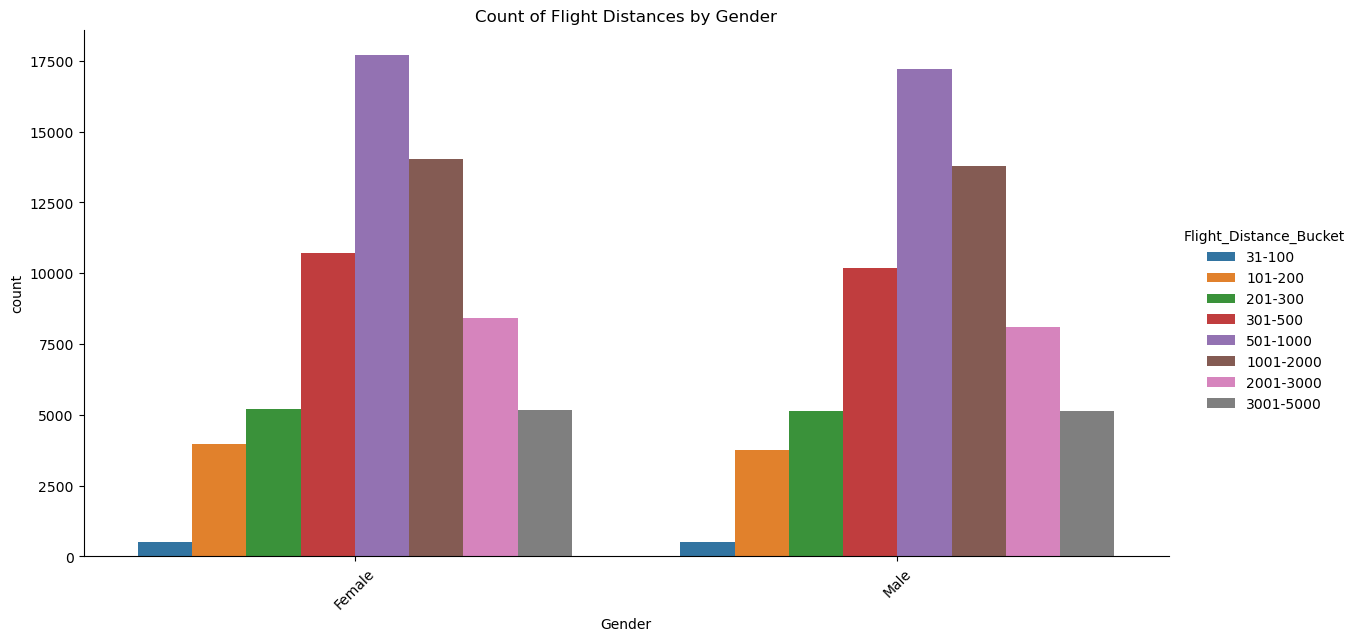

In [60]:
bins = [31, 100, 200, 300, 500, 1000, 2000, 3000, 5000]
labels = ['31-100', '101-200', '201-300', '301-500', '501-1000', '1001-2000', '2001-3000', '3001-5000']
sorted_df_flight_distance['Flight_Distance_Bucket'] = pd.cut(sorted_df_flight_distance['Flight Distance'], bins=bins, labels=labels, right=False)
sns.catplot(
    x='Gender', 
    hue='Flight_Distance_Bucket', 
    kind='count', 
    data=sorted_df_flight_distance, 
    height=6, 
    aspect=2
)
plt.title('Count of Flight Distances by Gender')
plt.xticks(rotation=45)
plt.show()

In [61]:
# distribution of class by gender with the help of a catplot 

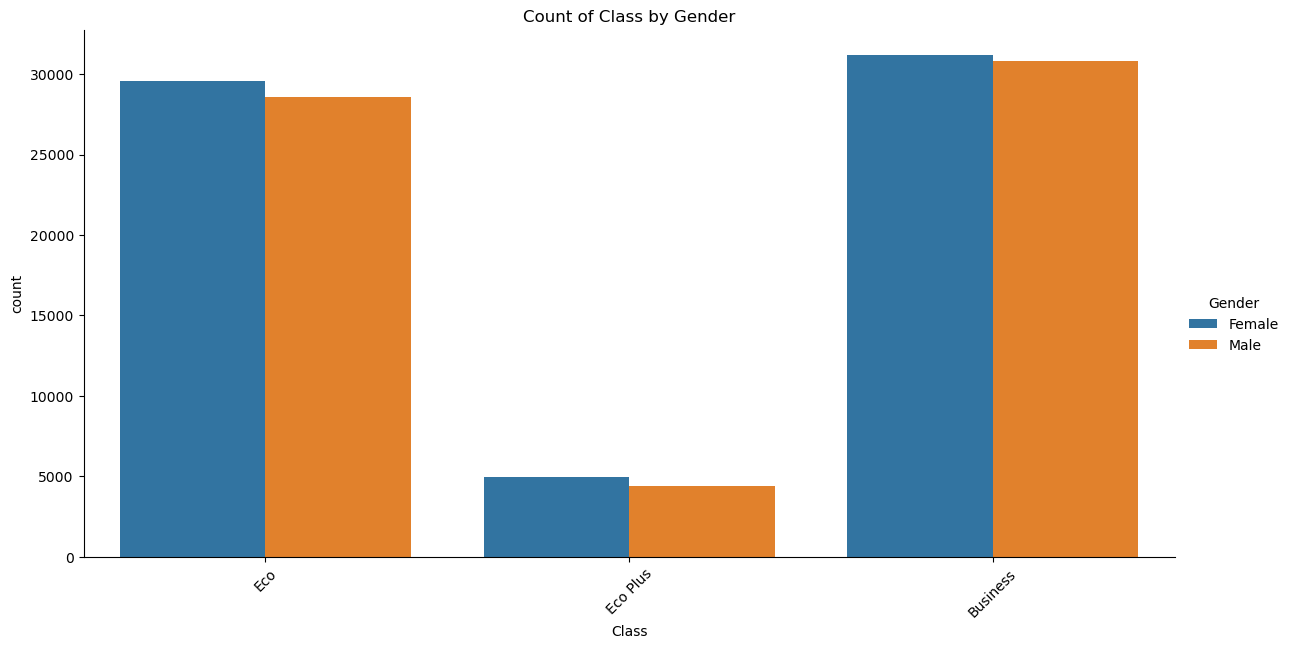

In [62]:
sns.catplot(
    x='Class', 
    hue='Gender', 
    kind='count', 
    data=sorted_df_flight_distance, 
    height=6, 
    aspect=2
)
plt.title('Count of Class by Gender')
plt.xticks(rotation=45)
plt.show()

C:\Users\yasmi\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\yasmi\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\yasmi\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
 

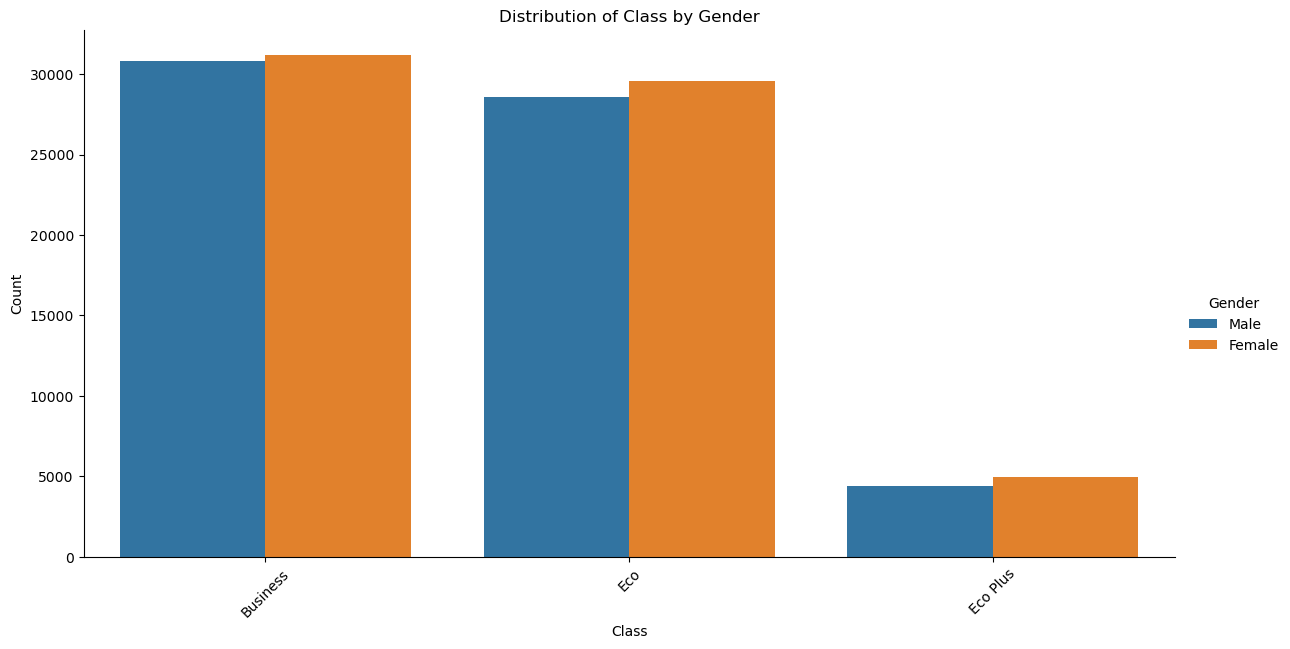

In [63]:
final_df1['Class'] = final_df1['Class'].astype('category')
sns.catplot(
    x='Class', 
    hue='Gender', 
    kind='count', 
    data=final_df1, 
    height=6, 
    aspect=2
)
plt.title('Distribution of Class by Gender')
plt.xticks(rotation=45)
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [64]:
# the data shows that personal travel customers are more likely to be neutral dissatisfied . at the same time economy passangers are also likely to be neutral or dissatisfied .
# we see that mean age for dissatisfied customer is 25 while the mean age satisfied customers is 50 . we see online booking is likely to influence the satisfaction level of the customer 

In [65]:
# label encoding with respect to columns : - customer type , gender , type of travel , satisfaction ( method 1)

In [66]:
label_encoder = LabelEncoder()

In [67]:
final_df1['Gender'] = label_encoder.fit_transform(final_df1['Gender'])

In [68]:
final_df1['Type of Travel'] = label_encoder.fit_transform(final_df1['Type of Travel'])

In [69]:
final_df1['Customer Type'] = label_encoder.fit_transform(final_df1['Customer Type'])

In [70]:
final_df1['satisfaction'] = label_encoder.fit_transform(final_df1['satisfaction'])

In [71]:
# Method 2 

In [72]:
from sklearn.preprocessing import LabelEncoder
label_encode_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']
le = LabelEncoder()
for col in label_encode_cols:
    final_df1[col] = le.fit_transform(final_df1[col])

In [73]:
final_df1

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,1,1,25,0,0,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,0,0,26,0,0,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,0,0,25,0,0,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,1,0,61,0,0,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,1,34,0,0,526,3,3,3,1,...,4,3,2,4,4,5,4,0,0.0,0
129876,1,0,23,0,0,646,4,4,4,4,...,4,4,5,5,5,5,4,0,0.0,1
129877,0,0,17,1,1,828,2,5,1,5,...,2,4,3,4,5,4,2,0,0.0,0
129878,1,0,14,0,0,1127,3,3,3,3,...,4,3,2,5,4,5,4,0,0.0,1


In [74]:
# everything is numerical so python can understand the data

In [75]:
# Plot the heatmap

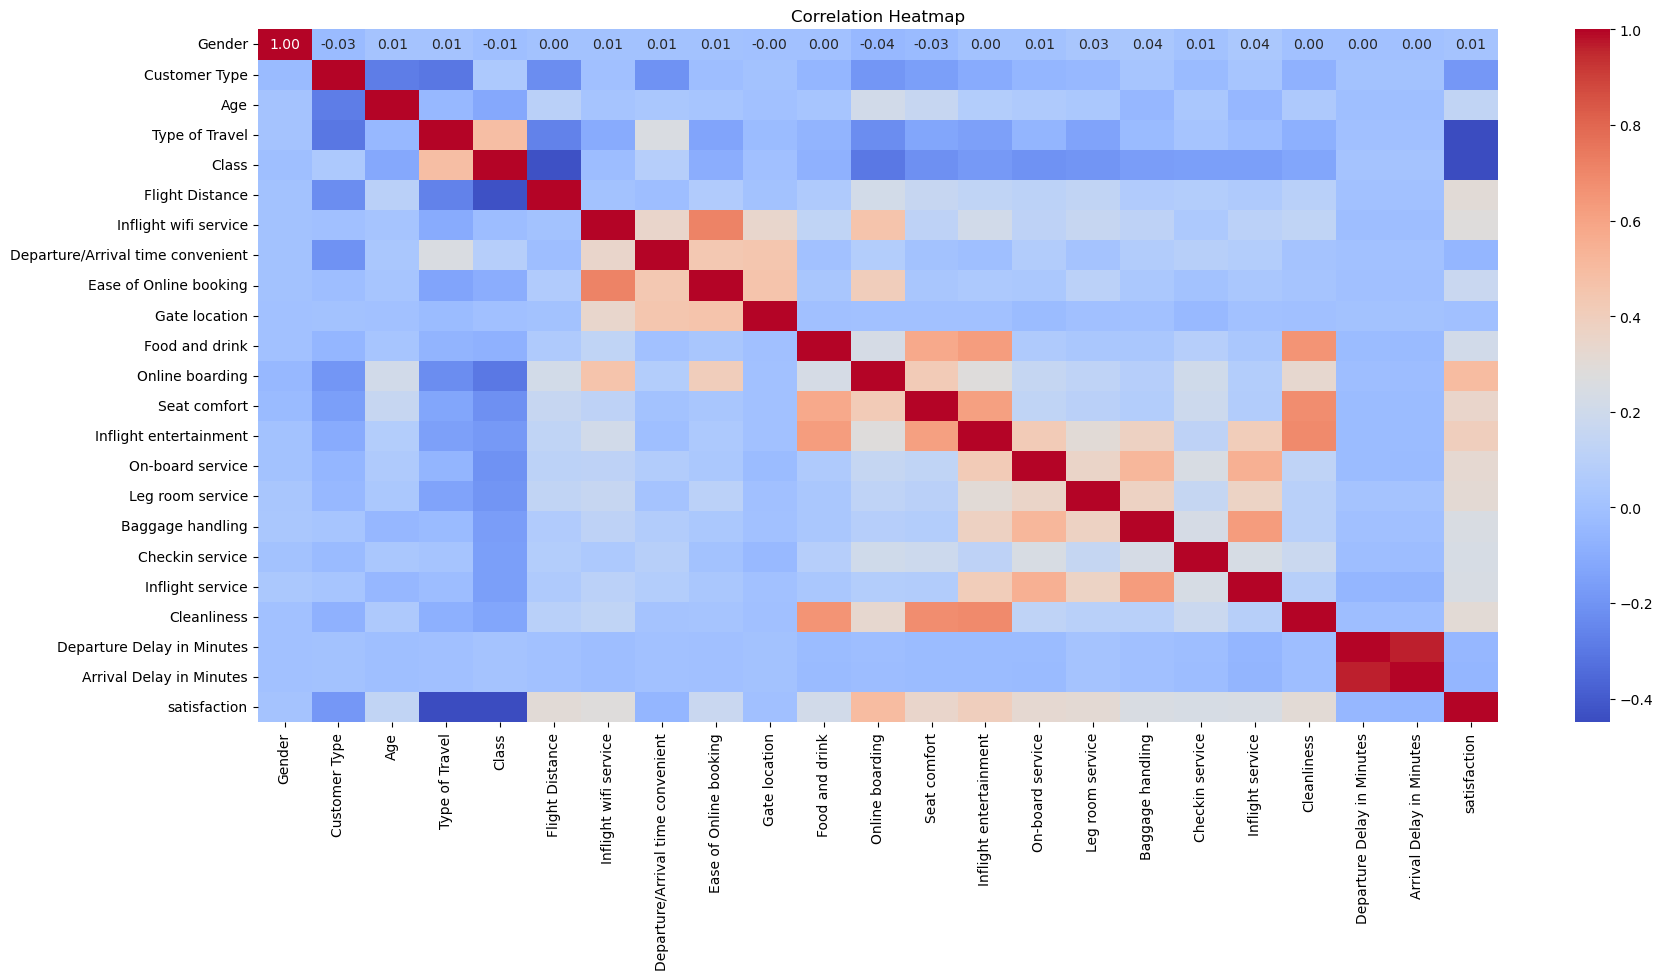

In [76]:
plt.figure(figsize=(20, 9))
sns.heatmap(final_df1.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [77]:
# dividing the data set into X & Y such that we can apply features scaling on X 

In [78]:
X = final_df1.drop('satisfaction', axis=1)

In [79]:
Y = final_df1['satisfaction']

In [80]:
X

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,0,13,1,2,460,3,4,3,1,...,5,5,4,3,4,4,5,5,25,18.0
1,1,1,25,0,0,235,3,2,3,3,...,1,1,1,5,3,1,4,1,1,6.0
2,0,0,26,0,0,1142,2,2,2,2,...,5,5,4,3,4,4,4,5,0,0.0
3,0,0,25,0,0,562,2,5,5,5,...,2,2,2,5,3,1,4,2,11,9.0
4,1,0,61,0,0,214,3,3,3,3,...,5,3,3,4,4,3,3,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,1,34,0,0,526,3,3,3,1,...,4,4,3,2,4,4,5,4,0,0.0
129876,1,0,23,0,0,646,4,4,4,4,...,4,4,4,5,5,5,5,4,0,0.0
129877,0,0,17,1,1,828,2,5,1,5,...,2,2,4,3,4,5,4,2,0,0.0
129878,1,0,14,0,0,1127,3,3,3,3,...,4,4,3,2,5,4,5,4,0,0.0


In [81]:
Y

0         0
1         0
2         1
3         0
4         1
         ..
129875    0
129876    1
129877    0
129878    1
129879    0
Name: satisfaction, Length: 129487, dtype: int64

In [82]:
# apply features scaling on X (preprocessing is the library)

In [83]:
from sklearn.preprocessing import MinMaxScaler

In [84]:
scaler = MinMaxScaler()

In [85]:
scaled_Final_df1 = scaler.fit_transform(X)

In [86]:
scaled_X = pd.DataFrame(scaled_Final_df1, 
                         columns=X.columns)

In [87]:
scaled_X

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1.0,0.0,0.076923,1.0,1.0,0.086632,0.6,0.8,0.6,0.2,...,1.0,1.0,0.8,0.6,0.75,0.8,1.0,1.0,0.015704,0.011364
1,1.0,1.0,0.230769,0.0,0.0,0.041195,0.6,0.4,0.6,0.6,...,0.2,0.2,0.2,1.0,0.50,0.2,0.8,0.2,0.000628,0.003788
2,0.0,0.0,0.243590,0.0,0.0,0.224354,0.4,0.4,0.4,0.4,...,1.0,1.0,0.8,0.6,0.75,0.8,0.8,1.0,0.000000,0.000000
3,0.0,0.0,0.230769,0.0,0.0,0.107229,0.4,1.0,1.0,1.0,...,0.4,0.4,0.4,1.0,0.50,0.2,0.8,0.4,0.006910,0.005682
4,1.0,0.0,0.692308,0.0,0.0,0.036955,0.6,0.6,0.6,0.6,...,1.0,0.6,0.6,0.8,0.75,0.6,0.6,0.6,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129482,1.0,1.0,0.346154,0.0,0.0,0.099960,0.6,0.6,0.6,0.2,...,0.8,0.8,0.6,0.4,0.75,0.8,1.0,0.8,0.000000,0.000000
129483,1.0,0.0,0.205128,0.0,0.0,0.124192,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,1.0,1.00,1.0,1.0,0.8,0.000000,0.000000
129484,0.0,0.0,0.128205,1.0,0.5,0.160945,0.4,1.0,0.2,1.0,...,0.4,0.4,0.8,0.6,0.75,1.0,0.8,0.4,0.000000,0.000000
129485,1.0,0.0,0.089744,0.0,0.0,0.221325,0.6,0.6,0.6,0.6,...,0.8,0.8,0.6,0.4,1.00,0.8,1.0,0.8,0.000000,0.000000


In [88]:
# breaking dataset to train and test to 75% train data and 25% test data 

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X,Y,test_size=0.25, random_state=91)

In [91]:
# apply the model on train data 

In [92]:
X_train, X_test, Y_train, Y_test

(        Gender  Customer Type       Age  Type of Travel  Class  \
 65407      0.0            0.0  0.512821             0.0    0.0   
 7541       1.0            0.0  0.166667             1.0    0.5   
 111034     1.0            0.0  0.371795             0.0    1.0   
 37716      1.0            0.0  0.115385             1.0    0.5   
 64387      1.0            0.0  0.833333             0.0    0.5   
 ...        ...            ...       ...             ...    ...   
 91997      1.0            0.0  0.666667             0.0    0.5   
 98514      0.0            0.0  0.500000             0.0    0.0   
 44906      0.0            1.0  0.384615             0.0    0.5   
 1710       0.0            1.0  0.230769             0.0    0.5   
 63666      0.0            0.0  0.474359             0.0    0.5   
 
         Flight Distance  Inflight wifi service  \
 65407          0.274233                    0.8   
 7541           0.071688                    0.6   
 111034         0.177908                 

In [93]:
# building the model

In [94]:
from sklearn.linear_model import LogisticRegression

In [95]:
lr=LogisticRegression(solver='liblinear')

In [96]:
# applying the saved instence lr with the help of train data to train the model based on historical paterns 

In [97]:
lr.fit(X_train, Y_train)

LogisticRegression(solver='liblinear')

In [98]:
# examin the data and predict based on test data

In [99]:
Y_pred=lr.predict(X_test)

In [100]:
Y_pred

array([1, 1, 0, ..., 0, 0, 1], dtype=int64)

In [101]:
# finding the accuracy of the model results

In [102]:
from sklearn import metrics

In [103]:
from sklearn.metrics import accuracy_score

In [104]:
print('Accuracy:', metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.8738724823921907


In [105]:
lr.score(X_train,Y_train)

0.874767028780312

In [106]:
# application of evaluation metrics 

In [107]:
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score

In [108]:
print('precision_score:',metrics.precision_score(Y_test, Y_pred))

precision_score: 0.8710230236197005


In [109]:
print('recall_score:',metrics.recall_score(Y_test, Y_pred))

recall_score: 0.8325024925224327


In [110]:
print('f1:',metrics.f1_score(Y_test, Y_pred))

f1: 0.8513272402869315


In [111]:
# precision score higher than recall score 

In [112]:
# classification matrix - confusion matrix 

In [113]:
from sklearn.metrics import classification_report

In [114]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89     18330
           1       0.87      0.83      0.85     14042

    accuracy                           0.87     32372
   macro avg       0.87      0.87      0.87     32372
weighted avg       0.87      0.87      0.87     32372



In [115]:
# apply hyperparameter tuning for logestic regression 

In [116]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

In [117]:
log_reg = LogisticRegression(solver='liblinear')

In [118]:
param_grid = { 'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']}

In [119]:
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

In [120]:
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=1)

In [121]:
print("Best parameters found: ", grid_search.best_params_) 
print("Best accuracy score: ", grid_search.best_score_)

Best parameters found:  {'C': 1, 'penalty': 'l1'}
Best accuracy score:  0.8745919785820935


In [122]:
best_model = grid_search.best_estimator_ 
Y_pred = best_model.predict(X_test) 
print("Test accuracy: ", accuracy_score(Y_test, Y_pred))

Test accuracy:  0.873687137032003


In [123]:
best_model = grid_search.best_estimator_

In [124]:
train_score = best_model.score(X_train, Y_train) 
print("Training accuracy: ", train_score)

Training accuracy:  0.8745404932296762


In [125]:
test_score = best_model.score(X_test, Y_test) 
print("Test accuracy: ", test_score)

Test accuracy:  0.873687137032003


In [126]:
Y_pred = best_model.predict(X_test)

In [127]:
precision = precision_score(Y_test, Y_pred, average='binary')

In [128]:
recall = recall_score(Y_test, Y_pred, average='binary')

In [129]:
f1 = f1_score(Y_test, Y_pred, average='binary')

In [130]:
print("Precision: ", precision) 
print("Recall: ", recall) 
print("F1 Score: ", f1)

Precision:  0.8707442449526931
Recall:  0.8323600626691354
F1 Score:  0.8511196067722554


In [131]:
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.89     18330
           1       0.87      0.83      0.85     14042

    accuracy                           0.87     32372
   macro avg       0.87      0.87      0.87     32372
weighted avg       0.87      0.87      0.87     32372



In [132]:
# applying decision tree in a classifier model

In [133]:
# Initialize the model

In [134]:
from sklearn.tree import DecisionTreeClassifier

In [135]:
clf = DecisionTreeClassifier(random_state=42)

In [136]:
# Train the model

In [137]:
clf.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [138]:
# Predict on the test set

In [139]:
Y_pred = clf.predict(X_test)

In [140]:
# Evaluate the model

In [141]:
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))
print("\nAccuracy Score:")
print(accuracy_score(Y_test, Y_pred))

Confusion Matrix:
[[17414   916]
 [  814 13228]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95     18330
           1       0.94      0.94      0.94     14042

    accuracy                           0.95     32372
   macro avg       0.95      0.95      0.95     32372
weighted avg       0.95      0.95      0.95     32372


Accuracy Score:
0.9465587544791796


In [142]:
clf.score(X_train, Y_train)

1.0

In [143]:
clf.score(X_test, Y_test)

0.9465587544791796

In [144]:
print("Precision:", precision_score(Y_test, Y_pred, average='macro'))

Precision: 0.945290492127372


In [145]:
print("Recall:", recall_score(Y_test, Y_pred, average='macro'))

Recall: 0.9460291636974354


In [146]:
print("f1:", f1_score(Y_test, Y_pred, average='macro'))

f1: 0.9456499736785968


In [147]:
# we have much overfitting because there is a huge gap between train score and test score while building decision tree model so apply custumization of paraneters 

In [148]:
# apply hyperparameter tuning to resolve the overfitting scenario of the decision tree as much as possible 

In [149]:
# Initialize the model

In [150]:
clf = DecisionTreeClassifier(random_state=42)

In [151]:
# With Hyperparameter Tuning
param_grid = {
    'max_depth': [2, 3, 4, 5],
    'min_samples_split': [2, 3, 4, 5],

}

In [152]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [153]:
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

In [154]:
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5]},
             scoring='accuracy', verbose=1)

In [155]:
# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 5, 'min_samples_split': 2}
Best Cross-Validation Score: 0.9044637800545745


In [156]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

In [157]:
# cv is cross validation

In [158]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [159]:
# Evaluate the best model using cross-validation
best_clf = grid_search.best_estimator_
cv_scores = cross_val_score(best_clf, X, Y, cv=cv, scoring='accuracy')

In [160]:
# Print cross-validation scores and mean score
print("Cross-Validation Scores (Best Model):", cv_scores)
print("Mean Cross-Validation Score (Best Model):", cv_scores.mean())

Cross-Validation Scores (Best Model): [0.90740598 0.90582284 0.90489246 0.90311619 0.90562613]
Mean Cross-Validation Score (Best Model): 0.9053727209420337


In [161]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

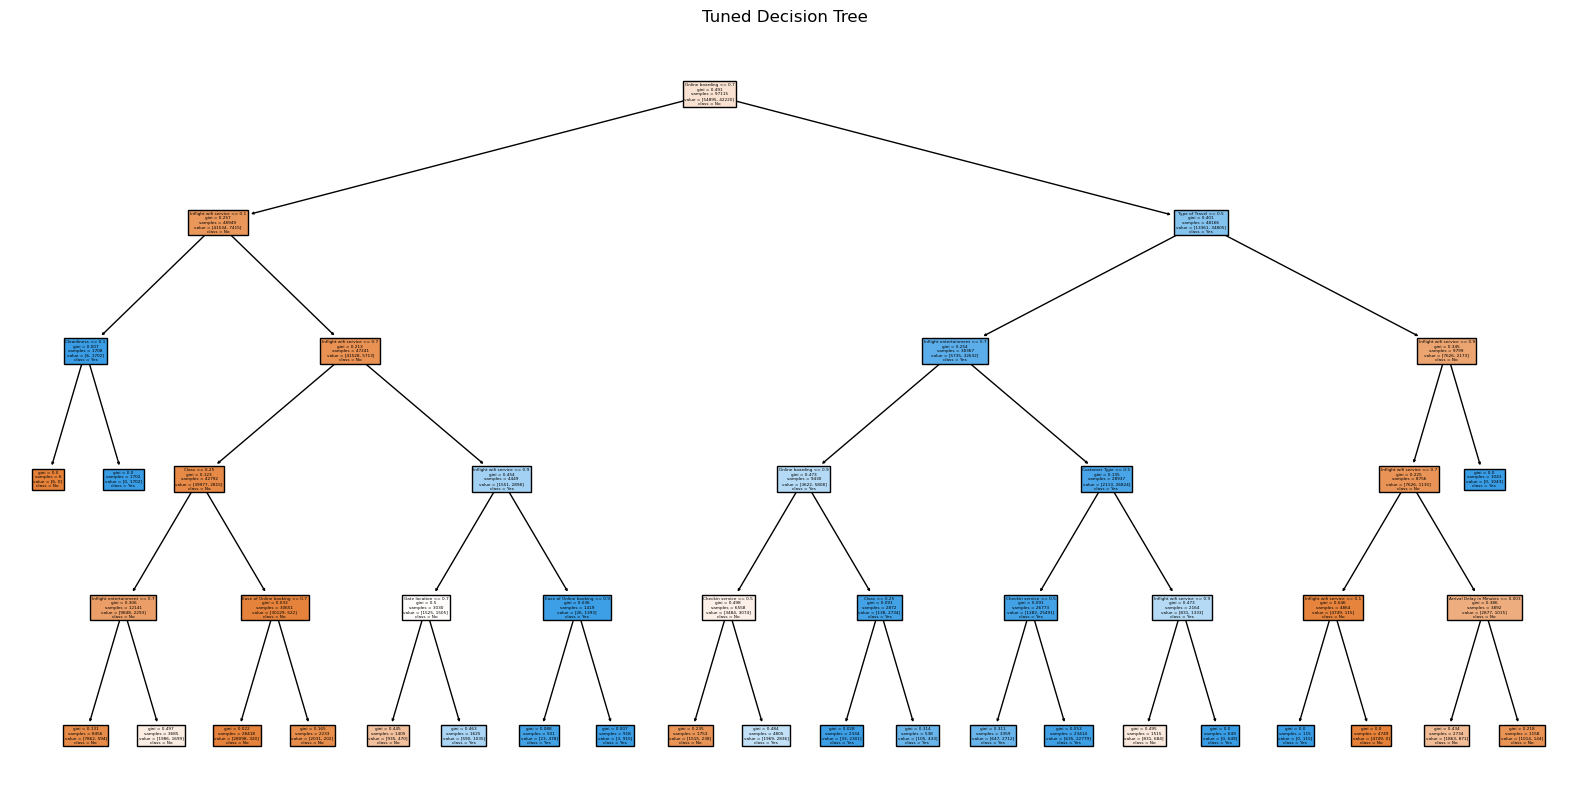

In [162]:
# Visualizing the decision tree for the best model
plt.figure(figsize=(20, 10))
plot_tree(best_clf, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.title('Tuned Decision Tree')
plt.show()

In [163]:
# Evaluate the best model on the test set
Y_pred_best = best_clf.predict(X_test)
print("\nWith Hyperparameter Tuning - Test Set Evaluation")
print("Accuracy:", accuracy_score(Y_test, Y_pred_best))
print("Precision:", precision_score(Y_test, Y_pred_best, average='macro'))
print("Recall:", recall_score(Y_test, Y_pred_best, average='macro'))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred_best))
print("Classification Report:\n", classification_report(Y_test, Y_pred_best))


With Hyperparameter Tuning - Test Set Evaluation
Accuracy: 0.9054429754108488
Precision: 0.9052977996311344
Recall: 0.9018176046251395
Confusion Matrix:
 [[17032  1298]
 [ 1763 12279]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92     18330
           1       0.90      0.87      0.89     14042

    accuracy                           0.91     32372
   macro avg       0.91      0.90      0.90     32372
weighted avg       0.91      0.91      0.91     32372



In [164]:
print("f1:", f1_score(Y_test, Y_pred, average='macro'))

f1: 0.9456499736785968


In [165]:
test_score_decisiontreetuned=grid_search.score(X_test, Y_test)

In [166]:
test_score_decisiontreetuned

0.9054429754108488

In [167]:
train_score_decisiontreetuned=grid_search.score(X_train, Y_train)

In [168]:
train_score_decisiontreetuned

0.9049889306492302

In [169]:
# With Hyperparameter Tuning
param_grid = {
    'max_depth': [2, 3, 4],
    'min_samples_split': [2, 3, 4, 10]

}

In [170]:
param_grid

{'max_depth': [2, 3, 4], 'min_samples_split': [2, 3, 4, 10]}

In [171]:
grid_search1 = GridSearchCV(estimator=clf, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

In [172]:
grid_search1.fit(X_train, Y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4],
                         'min_samples_split': [2, 3, 4, 10]},
             scoring='accuracy', verbose=1)

In [173]:
# Best parameters and best score
print("Best Parameters:", grid_search1.best_params_)
print("Best Cross-Validation Score:", grid_search1.best_score_)

Best Parameters: {'max_depth': 4, 'min_samples_split': 2}
Best Cross-Validation Score: 0.8887813417082839


In [174]:
cv1 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [175]:
# Evaluate the best model using cross-validation
best_clf1 = grid_search1.best_estimator_
cv1_scores = cross_val_score(best_clf, X, Y, cv=cv, scoring='accuracy')

In [176]:
# Print cross-validation scores and mean score
print("Cross-Validation Scores (Best Model):", cv1_scores)
print("Mean Cross-Validation Score (Best Model):", cv1_scores.mean())

Cross-Validation Scores (Best Model): [0.90740598 0.90582284 0.90489246 0.90311619 0.90562613]
Mean Cross-Validation Score (Best Model): 0.9053727209420337


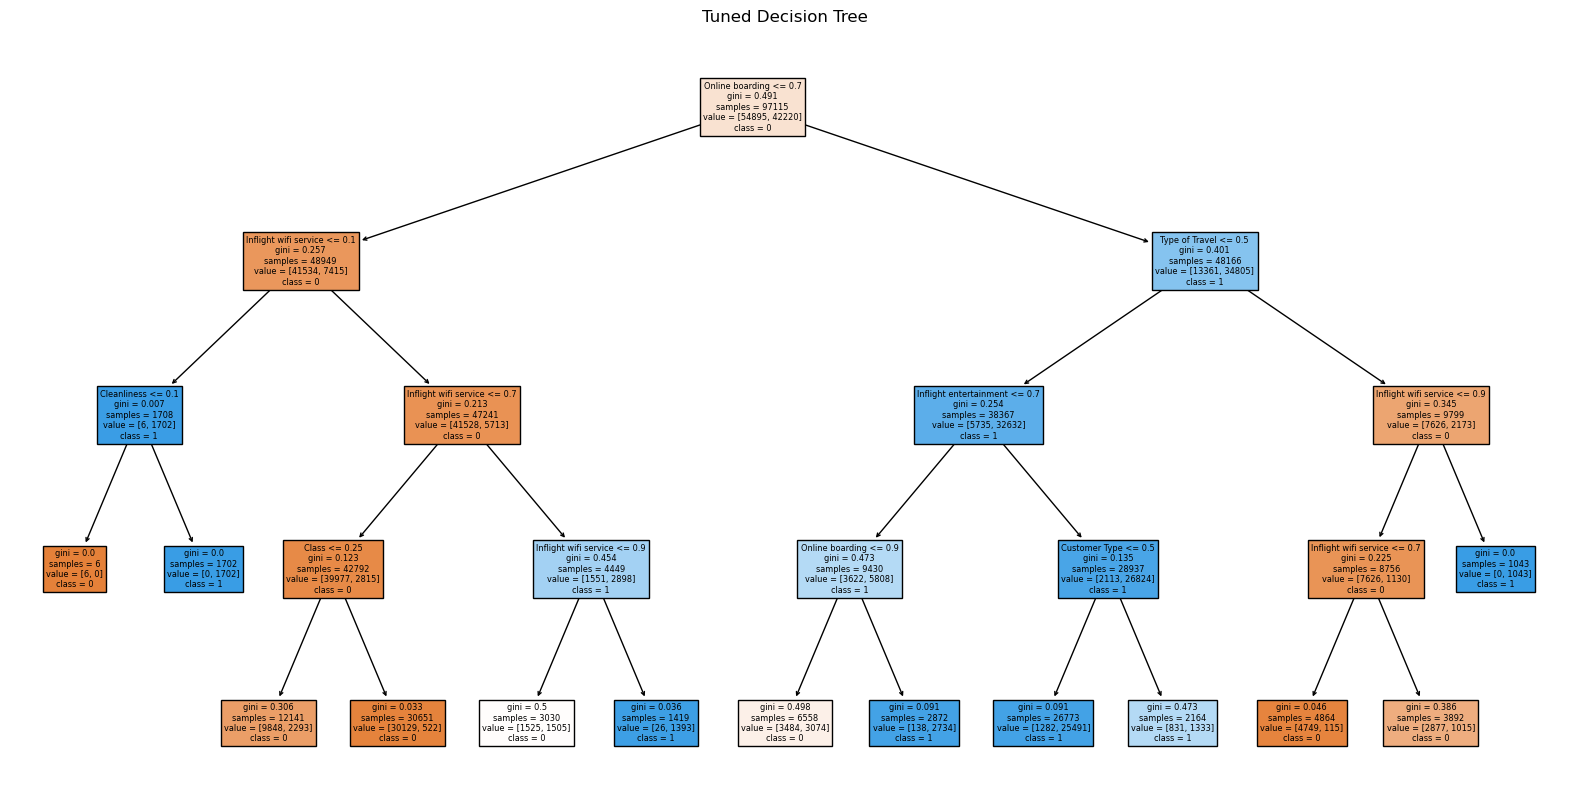

In [177]:
# Visualizing the decision tree for the best model
plt.figure(figsize=(20, 10))
plot_tree(best_clf1, filled=True, feature_names=X.columns, class_names=['0', '1','2'])
plt.title('Tuned Decision Tree')
plt.show()

In [178]:
# Evaluate the best model on the test set
Y_pred_best = best_clf1.predict(X_test)
print("\nWith Hyperparameter Tuning - Test Set Evaluation")
print("Accuracy:", accuracy_score(Y_test, Y_pred_best))
print("Precision:", precision_score(Y_test, Y_pred_best, average='macro'))
print("Recall:", recall_score(Y_test, Y_pred_best, average='macro'))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred_best))
print("Classification Report:\n", classification_report(Y_test, Y_pred_best))


With Hyperparameter Tuning - Test Set Evaluation
Accuracy: 0.8878969479797356
Precision: 0.8978575578006465
Recall: 0.8771611243737418
Confusion Matrix:
 [[17564   766]
 [ 2863 11179]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91     18330
           1       0.94      0.80      0.86     14042

    accuracy                           0.89     32372
   macro avg       0.90      0.88      0.88     32372
weighted avg       0.89      0.89      0.89     32372



In [179]:
best_clf1.score(X_test, Y_test)

0.8878969479797356

In [180]:
best_clf1.score(X_train, Y_train)

0.888781341708284

In [181]:
# first decision tree after doing hyperparameter tuning gives the best accuracy score of 90% without any overfitting

In [182]:
# Apply random forest model to check wether the accuracy score is better or not 

In [183]:
from sklearn.ensemble import RandomForestClassifier

In [184]:
rf = RandomForestClassifier(random_state=42)

In [185]:
rf.fit(X_train,Y_train)

RandomForestClassifier(random_state=42)

In [186]:
Y_pred_rf = rf.predict(X_test)

In [187]:
rf.score(X_test, Y_test)

0.9626220190287903

In [188]:
rf.score(X_train, Y_train)

1.0

In [189]:
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred_rf))
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred_rf))
print("\nAccuracy Score:")
print(accuracy_score(Y_test, Y_pred_rf))

Confusion Matrix:
[[17976   354]
 [  856 13186]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     18330
           1       0.97      0.94      0.96     14042

    accuracy                           0.96     32372
   macro avg       0.96      0.96      0.96     32372
weighted avg       0.96      0.96      0.96     32372


Accuracy Score:
0.9626220190287903


In [190]:
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score

In [191]:
print('Accuracy:', metrics.accuracy_score(Y_test, Y_pred_rf))

Accuracy: 0.9626220190287903


In [192]:
print('precision_score:', metrics.precision_score(Y_test, Y_pred_rf,average='macro'))

precision_score: 0.9642003491338794


In [193]:
print('recall_score:',metrics.recall_score(Y_test, Y_pred_rf,average='macro'))

recall_score: 0.9598637102487254


In [194]:
print('f1:',metrics.f1_score(Y_test, Y_pred_rf,average='macro'))

f1: 0.9617853339339486


In [195]:
# apply random forest with hyperparameter tuning

In [980]:
from sklearn.ensemble import RandomForestClassifier

In [982]:
clf_tuned = RandomForestClassifier(random_state=42)

In [984]:
# With Hyperparameter Tuning
param_grid = {
    'n_estimators': [3,5,10],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [986]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [988]:
grid_search1 = GridSearchCV(estimator=clf_tuned, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

In [990]:
grid_search1.fit(X_train, Y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [3, 5, 10]},
             scoring='accuracy', verbose=1)

In [991]:
# Best parameters and best score
print("Best Parameters:", grid_search1.best_params_)
print("Best Cross-Validation Score:", grid_search1.best_score_)

Best Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 10}
Best Cross-Validation Score: 0.9581527055552697


In [992]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

In [993]:
# cv is cross validation

In [994]:
cv1 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [995]:
# Evaluate the best model using cross-validation
best_clf_tuned = grid_search1.best_estimator_
cv1_scores = cross_val_score(best_clf_tuned, X, Y, cv=cv, scoring='accuracy')

In [996]:
# Print cross-validation scores and mean score
print("Cross-Validation Scores (Best Model):", cv1_scores)
print("Mean Cross-Validation Score (Best Model):", cv1_scores.mean())

Cross-Validation Scores (Best Model): [0.96134837 0.96080778 0.95756265 0.95980229 0.95972506]
Mean Cross-Validation Score (Best Model): 0.9598492322960107


In [997]:
y_pred = best_clf_tuned.predict(X_test)

In [998]:
print('precision_score:',metrics.precision_score(Y_test, y_pred,average='macro'))

precision_score: 0.9607668414234163


In [999]:
print('Accuracy:', metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.9594402570122328


In [1000]:
print('recall_score:',metrics.recall_score(Y_test, y_pred, average='macro'))

recall_score: 0.9567542365499557


In [1001]:
print('f1:',metrics.f1_score(Y_test, y_pred,average='macro'))

f1: 0.9585443222956354


In [1002]:
grid_search1.score(X_test, Y_test)

0.9594402570122328

In [1003]:
grid_search1.score(X_train, Y_train)

0.9818771559491325

In [214]:
# random forest default gives the best accuracy score with overfitting scenario 

In [215]:
# feature importances with the help of random forest 

In [216]:
# training the random forest classifier model 
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [217]:
# Getting feature importances
importances = rf.feature_importances_

In [218]:
importances

array([0.00500126, 0.03214333, 0.03407436, 0.08215162, 0.10845757,
       0.03434318, 0.13788123, 0.01710724, 0.04046597, 0.01682613,
       0.01188922, 0.17885761, 0.04213019, 0.06284058, 0.03017945,
       0.04181311, 0.02457697, 0.02533656, 0.0231112 , 0.02666445,
       0.01132575, 0.01282302])

In [219]:
# creating a data frame for feature importances

In [220]:
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})

In [221]:
feature_importances

,feature,importance
0,Gender,0.005001
1,Customer Type,0.032143
2,Age,0.034074
3,Type of Travel,0.082152
4,Class,0.108458
5,Flight Distance,0.034343
6,Inflight wifi service,0.137881
7,Departure/Arrival time convenient,0.017107
8,Ease of Online booking,0.040466
9,Gate location,0.016826


In [222]:
# sorting by importance 

In [223]:
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

In [224]:
feature_importances

,feature,importance
11,Online boarding,0.178858
6,Inflight wifi service,0.137881
4,Class,0.108458
3,Type of Travel,0.082152
13,Inflight entertainment,0.062841
12,Seat comfort,0.042130
15,Leg room service,0.041813
8,Ease of Online booking,0.040466
5,Flight Distance,0.034343
2,Age,0.034074


In [225]:
# ploting the feature importances 

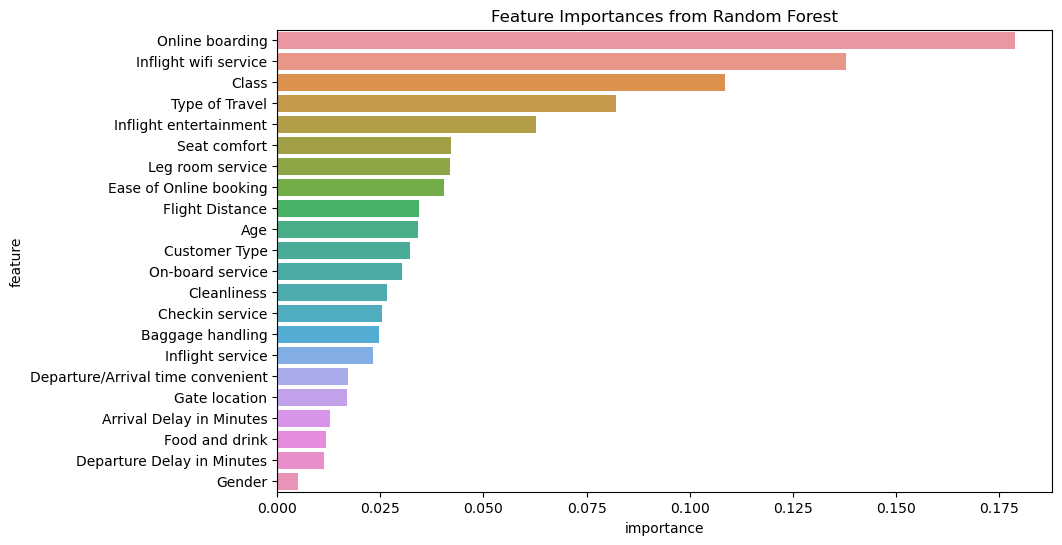

In [226]:
# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('Feature Importances from Random Forest')
plt.show()

In [227]:
# applying SVM for cross check of model performance 

In [228]:
# runing svm with default hyperparameter 

In [229]:
# Running SVM with default hyperparameter.
from sklearn.svm import SVC

In [230]:
from sklearn import metrics
svc=SVC() # Default hyperparameters

In [231]:
svc=SVC()

In [232]:
svc.fit(X_train, Y_train)

SVC()

In [233]:
Y_pred=svc.predict(X_test)

In [235]:
print("Classification Report:\n", classification_report(Y_test, Y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96     18330
           1       0.95      0.93      0.94     14042

    accuracy                           0.95     32372
   macro avg       0.95      0.95      0.95     32372
weighted avg       0.95      0.95      0.95     32372



In [236]:
confusion_matrix_best=pd.crosstab(Y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'])
confusion_matrix_best

Predicted,0,1
Actual,,
0,17700,630
1,982,13060


In [237]:
print(metrics.accuracy_score(Y_test,Y_pred))

0.9502038798962066


In [238]:
print("Accuracy Score:", accuracy_score(Y_test, Y_pred))

Accuracy Score: 0.9502038798962066


In [239]:
Y_pred

array([1, 1, 0, ..., 1, 0, 1], dtype=int64)

In [240]:
Y_test

33781     1
92684     1
28086     0
48777     0
5958      0
         ..
123119    1
391       0
77206     1
95740     0
5677      1
Name: satisfaction, Length: 32372, dtype: int64

In [241]:
accuracy = accuracy_score(Y_test, Y_pred)
accuracy

0.9502038798962066

In [242]:
svc.score(X_test, Y_test)

0.9502038798962066

In [243]:
svc.score(X_train, Y_train)

0.9523245636616383

In [244]:
# there is not that much overfitting 

In [245]:
# applying SVM model with kernel with linear 

In [246]:
svc_linear =SVC(kernel='linear')

In [247]:
svc_linear.fit(X_train,Y_train)

SVC(kernel='linear')

In [248]:
X_train

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
65407,0.0,0.0,0.512821,0.0,0.0,0.274233,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.75,0.8,0.8,0.6,0.000000,0.000000
7541,1.0,0.0,0.166667,1.0,0.5,0.071688,0.6,0.8,0.6,0.2,...,0.6,1.0,1.0,0.8,1.00,0.8,0.8,1.0,0.005653,0.000631
111034,1.0,0.0,0.371795,0.0,1.0,0.177908,0.8,0.2,0.2,0.2,...,0.8,0.6,0.8,0.8,0.75,0.8,0.8,0.8,0.253769,0.260732
37716,1.0,0.0,0.115385,1.0,0.5,0.045234,0.6,0.6,0.0,0.6,...,1.0,1.0,0.2,1.0,0.25,0.2,0.6,1.0,0.000000,0.000000
64387,1.0,0.0,0.833333,0.0,0.5,0.356624,0.8,0.4,0.4,0.4,...,0.8,0.8,0.2,1.0,0.50,0.4,0.4,0.8,0.016332,0.018939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91997,1.0,0.0,0.666667,0.0,0.5,0.059976,0.8,0.8,0.8,0.8,...,0.8,0.8,0.6,0.4,0.50,0.4,0.8,0.8,0.000000,0.000000
98514,0.0,0.0,0.500000,0.0,0.0,0.017165,0.2,1.0,1.0,1.0,...,0.4,0.6,0.6,0.6,0.00,0.8,0.6,0.6,0.029523,0.062500
44906,0.0,1.0,0.384615,0.0,0.5,0.084006,0.4,0.0,0.4,0.6,...,0.2,0.2,0.4,0.2,0.25,0.2,1.0,0.2,0.000628,0.000000
1710,0.0,1.0,0.230769,0.0,0.5,0.115307,0.8,0.2,0.8,0.6,...,1.0,0.8,0.6,0.8,0.75,0.4,0.6,0.8,0.011307,0.011364


In [249]:
Y_train

65602     1
7559      0
111370    0
37829     0
64581     0
         ..
92274     0
98812     0
45042     0
1713      0
63859     0
Name: satisfaction, Length: 97115, dtype: int64

In [250]:
Y_pred_linear=svc_linear.predict(X_test)

In [251]:
Y_pred_linear

array([1, 1, 0, ..., 0, 0, 1], dtype=int64)

In [252]:
print("Classification Report:\n", classification_report(Y_test, Y_pred_linear))

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89     18330
           1       0.88      0.83      0.85     14042

    accuracy                           0.88     32372
   macro avg       0.88      0.87      0.87     32372
weighted avg       0.88      0.88      0.88     32372



In [253]:
confusion_matrix_svc=pd.crosstab(Y_test, Y_pred_linear, rownames=['Actual'], colnames=['Predicted'])
confusion_matrix_svc

Predicted,0,1
Actual,,
0,16766,1564
1,2445,11597


In [254]:
print(metrics.accuracy_score(Y_test,Y_pred_linear))

0.8761584085011739


In [255]:
Y_test

33781     1
92684     1
28086     0
48777     0
5958      0
         ..
123119    1
391       0
77206     1
95740     0
5677      1
Name: satisfaction, Length: 32372, dtype: int64

In [256]:
Y_pred_linear

array([1, 1, 0, ..., 0, 0, 1], dtype=int64)

In [257]:
svc_linear.score(X_test, Y_test)

0.8761584085011739

In [258]:
X_test

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
33690,0.0,0.0,0.243590,0.0,0.0,0.343498,0.6,0.8,0.6,0.6,...,0.8,0.8,1.0,1.0,1.00,0.8,1.0,0.8,0.000000,0.001263
92407,1.0,0.0,0.679487,0.0,0.0,0.073910,0.6,0.6,0.6,0.6,...,0.8,1.0,1.0,1.0,1.00,0.8,1.0,0.8,0.018216,0.013889
28010,0.0,0.0,0.487179,0.0,1.0,0.052302,0.4,0.8,0.8,0.8,...,0.6,0.4,0.4,0.4,0.25,0.4,0.4,0.6,0.001884,0.013258
48622,1.0,0.0,0.089744,1.0,0.5,0.460420,0.2,0.8,0.2,0.8,...,0.6,0.8,1.0,0.8,0.50,0.6,0.2,0.6,0.010050,0.011364
5942,0.0,0.0,0.461538,0.0,1.0,0.072698,0.6,0.2,0.2,0.2,...,0.6,0.6,0.6,0.6,0.50,0.8,0.6,0.8,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122746,0.0,1.0,0.230769,0.0,0.0,0.254039,0.8,1.0,0.8,0.8,...,0.2,0.8,0.8,1.0,0.75,0.6,1.0,0.8,0.000628,0.000000
390,1.0,0.0,0.474359,1.0,0.5,0.032512,0.4,0.8,0.4,1.0,...,0.8,0.8,0.6,0.2,0.75,0.2,0.4,0.8,0.000000,0.000000
76977,1.0,0.0,0.179487,1.0,0.5,0.148223,0.0,0.2,0.0,0.8,...,0.8,0.8,0.2,0.8,0.50,0.8,0.8,0.8,0.000000,0.000000
95451,0.0,0.0,0.743590,1.0,0.5,0.110258,0.4,0.8,0.4,0.8,...,0.8,0.2,0.2,0.4,0.00,1.0,0.2,1.0,0.001256,0.000000


In [259]:
Y_test

33781     1
92684     1
28086     0
48777     0
5958      0
         ..
123119    1
391       0
77206     1
95740     0
5677      1
Name: satisfaction, Length: 32372, dtype: int64

In [260]:
svc_linear.score(X_train, Y_train)

0.876332183493796

In [926]:
print("Accuracy:", accuracy_score(Y_test, Y_pred_linear))

Accuracy: 0.8761584085011739


In [928]:
print('precision_score:',metrics.precision_score(Y_test, Y_pred_linear))

precision_score: 0.8811640452853127


In [930]:
print('recall_score:',metrics.recall_score(Y_test, Y_pred_linear))

recall_score: 0.8258795043441105


In [932]:
print('f1:',metrics.f1_score(Y_test, Y_pred_linear,average='macro'))

f1: 0.8729183194218555


In [265]:
X_train

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
65407,0.0,0.0,0.512821,0.0,0.0,0.274233,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.75,0.8,0.8,0.6,0.000000,0.000000
7541,1.0,0.0,0.166667,1.0,0.5,0.071688,0.6,0.8,0.6,0.2,...,0.6,1.0,1.0,0.8,1.00,0.8,0.8,1.0,0.005653,0.000631
111034,1.0,0.0,0.371795,0.0,1.0,0.177908,0.8,0.2,0.2,0.2,...,0.8,0.6,0.8,0.8,0.75,0.8,0.8,0.8,0.253769,0.260732
37716,1.0,0.0,0.115385,1.0,0.5,0.045234,0.6,0.6,0.0,0.6,...,1.0,1.0,0.2,1.0,0.25,0.2,0.6,1.0,0.000000,0.000000
64387,1.0,0.0,0.833333,0.0,0.5,0.356624,0.8,0.4,0.4,0.4,...,0.8,0.8,0.2,1.0,0.50,0.4,0.4,0.8,0.016332,0.018939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91997,1.0,0.0,0.666667,0.0,0.5,0.059976,0.8,0.8,0.8,0.8,...,0.8,0.8,0.6,0.4,0.50,0.4,0.8,0.8,0.000000,0.000000
98514,0.0,0.0,0.500000,0.0,0.0,0.017165,0.2,1.0,1.0,1.0,...,0.4,0.6,0.6,0.6,0.00,0.8,0.6,0.6,0.029523,0.062500
44906,0.0,1.0,0.384615,0.0,0.5,0.084006,0.4,0.0,0.4,0.6,...,0.2,0.2,0.4,0.2,0.25,0.2,1.0,0.2,0.000628,0.000000
1710,0.0,1.0,0.230769,0.0,0.5,0.115307,0.8,0.2,0.8,0.6,...,1.0,0.8,0.6,0.8,0.75,0.4,0.6,0.8,0.011307,0.011364


In [266]:
Y_train

65602     1
7559      0
111370    0
37829     0
64581     0
         ..
92274     0
98812     0
45042     0
1713      0
63859     0
Name: satisfaction, Length: 97115, dtype: int64

In [267]:
# applying SVM model with kernel with RBF 

In [268]:
svc_rbf =SVC(kernel='rbf')

In [269]:
svc_rbf.fit(X_train,Y_train)

SVC()

In [270]:
Y_pred_rbf=svc_rbf.predict(X_test)

In [940]:
print("Accuracy:", accuracy_score(Y_test, Y_pred_rbf))

Accuracy: 0.9502038798962066


In [934]:
print('precision_score:',metrics.precision_score(Y_test, Y_pred_rbf))

precision_score: 0.9539810080350621


In [936]:
print('recall_score:',metrics.recall_score(Y_test, Y_pred_rbf))

recall_score: 0.9300669420310497


In [938]:
print('f1:',metrics.f1_score(Y_test, Y_pred_rbf,average='macro'))

f1: 0.9491593816338062


In [275]:
print("Classification Report:\n", classification_report(Y_test, Y_pred_rbf))

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96     18330
           1       0.95      0.93      0.94     14042

    accuracy                           0.95     32372
   macro avg       0.95      0.95      0.95     32372
weighted avg       0.95      0.95      0.95     32372



In [276]:
confusion_matrix_rbf=pd.crosstab(Y_test, Y_pred_rbf, rownames=['Actual'], colnames=['Predicted'])
confusion_matrix_rbf

Predicted,0,1
Actual,,
0,17700,630
1,982,13060


In [277]:
print(metrics.accuracy_score(Y_test,Y_pred_rbf))

0.9502038798962066


In [278]:
svc_rbf.score(X_test, Y_test)

0.9502038798962066

In [279]:
svc_rbf.score(X_train, Y_train)

0.9523245636616383

In [280]:
# svm with rbf fit reflected no overfitting and was able to default model with rbf as the selected kernel 

In [281]:
# Train the KNN model

In [282]:
from sklearn.neighbors import KNeighborsClassifier

In [283]:
knn = KNeighborsClassifier(n_neighbors=5)

In [284]:
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [285]:
X_train

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
65407,0.0,0.0,0.512821,0.0,0.0,0.274233,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.75,0.8,0.8,0.6,0.000000,0.000000
7541,1.0,0.0,0.166667,1.0,0.5,0.071688,0.6,0.8,0.6,0.2,...,0.6,1.0,1.0,0.8,1.00,0.8,0.8,1.0,0.005653,0.000631
111034,1.0,0.0,0.371795,0.0,1.0,0.177908,0.8,0.2,0.2,0.2,...,0.8,0.6,0.8,0.8,0.75,0.8,0.8,0.8,0.253769,0.260732
37716,1.0,0.0,0.115385,1.0,0.5,0.045234,0.6,0.6,0.0,0.6,...,1.0,1.0,0.2,1.0,0.25,0.2,0.6,1.0,0.000000,0.000000
64387,1.0,0.0,0.833333,0.0,0.5,0.356624,0.8,0.4,0.4,0.4,...,0.8,0.8,0.2,1.0,0.50,0.4,0.4,0.8,0.016332,0.018939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91997,1.0,0.0,0.666667,0.0,0.5,0.059976,0.8,0.8,0.8,0.8,...,0.8,0.8,0.6,0.4,0.50,0.4,0.8,0.8,0.000000,0.000000
98514,0.0,0.0,0.500000,0.0,0.0,0.017165,0.2,1.0,1.0,1.0,...,0.4,0.6,0.6,0.6,0.00,0.8,0.6,0.6,0.029523,0.062500
44906,0.0,1.0,0.384615,0.0,0.5,0.084006,0.4,0.0,0.4,0.6,...,0.2,0.2,0.4,0.2,0.25,0.2,1.0,0.2,0.000628,0.000000
1710,0.0,1.0,0.230769,0.0,0.5,0.115307,0.8,0.2,0.8,0.6,...,1.0,0.8,0.6,0.8,0.75,0.4,0.6,0.8,0.011307,0.011364


In [286]:
Y_train

65602     1
7559      0
111370    0
37829     0
64581     0
         ..
92274     0
98812     0
45042     0
1713      0
63859     0
Name: satisfaction, Length: 97115, dtype: int64

In [287]:
Y_pred = knn.predict(X_test)

In [288]:
Y_pred

array([1, 1, 0, ..., 0, 0, 1], dtype=int64)

In [289]:
print("Accuracy:", accuracy_score(Y_test, Y_pred))

Accuracy: 0.9291362906215248


In [290]:
print('precision_score:',metrics.precision_score(Y_test, Y_pred))

precision_score: 0.9524029574861368


In [291]:
print('recall_score:',metrics.recall_score(Y_test, Y_pred))

recall_score: 0.8806437829369036


In [292]:
print('f1:',metrics.f1_score(Y_test, Y_pred))

f1: 0.9151187745134316


In [293]:
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))

Confusion Matrix:
 [[17712   618]
 [ 1676 12366]]


In [294]:
print("Classification Report:\n", classification_report(Y_test, Y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94     18330
           1       0.95      0.88      0.92     14042

    accuracy                           0.93     32372
   macro avg       0.93      0.92      0.93     32372
weighted avg       0.93      0.93      0.93     32372



In [295]:
knn.score(X_test, Y_test)

0.9291362906215248

In [296]:
knn.score(X_train, Y_train)

0.9507182206662205

In [297]:
# Applying KNN classifier to check whether it can capture the historical data by applying a range of neighboors 

In [298]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
neighbors = np.arange(1,9)
neighbors

array([1, 2, 3, 4, 5, 6, 7, 8])

In [299]:
# Set up arrays to store train and test accuracies for different values of K.

In [300]:
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [301]:
# Generating a for loop with the list of neighbours to do the train data fit for each of the K values and find out their

In [302]:
# train and test accuracies.

In [303]:
for i,k in enumerate(neighbors):   
    
    # Enumerate: We are using a loop to iterate over different values of k for the number of neighbours in a K nearest Neighbors 
    # classifier.
    
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Using scikitlearn's KNeighborsClassifier, we are training the classifier with different values of
    # k and evaluating
    # it's performance.
    
    knn.fit(X_train, Y_train)
    
    
    train_accuracy[i] = knn.score(X_train, Y_train)
    
   
    test_accuracy[i] = knn.score(X_test, Y_test)

In [304]:
train_accuracy[i]

0.9401019409977861

In [305]:
test_accuracy[i]

0.9259236377116026

In [306]:
# Changing the range to check the stable point of train and test score is better for any of k = greater than 8 pointers.

neighbors = np.arange(1,15)
neighbors

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [307]:
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [308]:
for i,k in enumerate(neighbors):
    
    knn = KNeighborsClassifier(n_neighbors=k)
    
    
    knn.fit(X_train, Y_train)
    
    
    train_accuracy[i] = knn.score(X_train, Y_train)
    
   
    test_accuracy[i] = knn.score(X_test, Y_test)

In [309]:
train_accuracy[i]

0.9356433094784534

In [310]:
test_accuracy[i]

0.9254911652044977

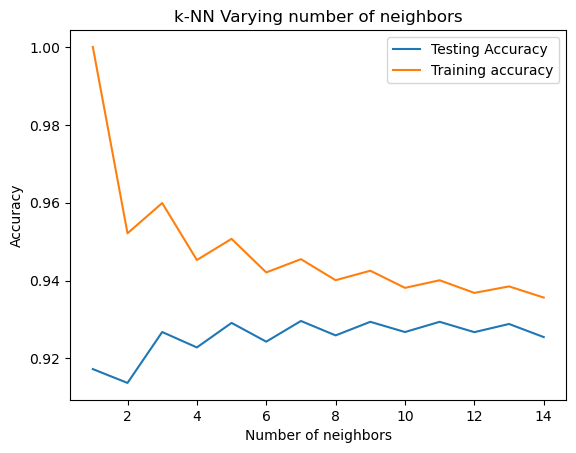

In [311]:
# Checking for the stable train and test accuracy scores with the help of plot

plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [312]:
# we need to fit KNN model with k = 8 to get the final best accuracy. by optimazing the stabilazed train and test score ensuring no underfitting as well as overfitting and maximazing the accuracy score 

In [313]:
# we get k = 8 as the best knn parameter . so fitting the knn model with the best knn parameter 

In [314]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=8)

In [315]:
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score, classification_report # Evaluation

In [316]:
train_accuracy_knn_final = knn.score(X_train, Y_train)

In [317]:
train_accuracy_knn_final

0.9401019409977861

In [318]:
test_accuracy_knn_final = knn.score(X_test, Y_test)

In [319]:
test_accuracy_knn_final

0.9259236377116026

In [320]:
Y_pred = knn.predict(X_test)

In [321]:
# Checking evaluation metrics for knn with k =8

In [322]:
accuracy_knn = accuracy_score(Y_test, Y_pred)

In [323]:
accuracy_knn

0.9259236377116026

In [324]:
precision_knn = precision_score(Y_test, Y_pred)

In [325]:
precision_knn

0.9647932300814306

In [326]:
recall_knn = recall_score(Y_test, Y_pred)

In [327]:
recall_knn

0.8606323885486398

In [328]:
f1_knn = f1_score(Y_test, Y_pred)

In [329]:
f1_knn

0.9097410418548629

In [330]:
cf_knn = confusion_matrix(Y_test, Y_pred)

In [331]:
from sklearn.metrics import classification_report

In [332]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     18330
           1       0.96      0.86      0.91     14042

    accuracy                           0.93     32372
   macro avg       0.93      0.92      0.92     32372
weighted avg       0.93      0.93      0.93     32372



In [333]:
# ROC Curve

In [334]:
# It shows the trade-off between specificity (True Negative rate) and sensitivity (True Positive rate or Recall).

In [335]:
# Finding the probability of predicted value.

In [336]:
Y_pred_proba = knn.predict_proba(X_test)[:,1]

In [337]:
# Specificity = True Negatives / (True Negative + False Positive)
# Sensitivity = True Positive / (True Positive + False Negative)
# High Specificity: The model is good at avoiding false positives, but may have more false negatives.
# High Sensitivity (high recall): The model is good at identifying positive cases, but may have more false positives.

In [338]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_proba)

In [339]:
# Plot ROC Curve

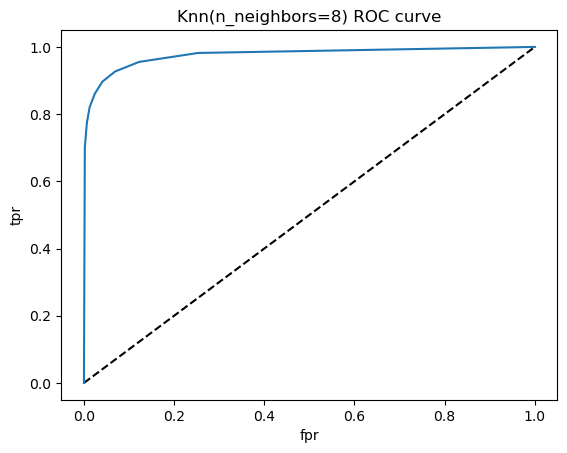

In [340]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=8) ROC curve')
plt.show()

In [341]:
# Finding the ROC AUC-(Area Under the ROC Curve) score

In [342]:
from sklearn.metrics import roc_auc_score

In [343]:
roc_auc_score(Y_test,Y_pred_proba)

0.9760224256697603

In [344]:
# KNN with Cross Validation 

In [345]:
# Saving the possible options of parameter to pass in the model in 'param_grid' param_grid = {'n_neighbors' : np.arange(1,50)}

In [346]:
# Saving the instance of the class knn = KNeighborsClassifier()

In [347]:
# Best parameters and best score
print("Best Parameters:", grid_search1.best_params_)
print("Best Cross-Validation Score:", grid_search1.best_score_)

Best Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 10}
Best Cross-Validation Score: 0.9581527055552697


In [348]:
knn1 = KNeighborsClassifier(
n_neighbors=8,
weights='uniform',
algorithm='auto',
leaf_size=30,
metric='minkowski',
metric_params=None,
p=2
)

In [349]:
knn1.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=8)

In [350]:
predictions = knn1.predict(X_test)

In [351]:
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score, classification_report # Evaluation

In [352]:
train_accuracy_knn1_final = knn1.score(X_train, Y_train)

In [353]:
train_accuracy_knn1_final

0.9401019409977861

In [354]:
test_accuracy_knn1_final = knn1.score(X_test, Y_test)

In [355]:
test_accuracy_knn1_final

0.9259236377116026

In [356]:
Y_pred = knn1.predict(X_test)

In [357]:
accuracy_knn1 = accuracy_score(Y_test, Y_pred)

In [358]:
accuracy_knn1

0.9259236377116026

In [359]:
print('precision_score:',metrics.precision_score(Y_test, Y_pred))

precision_score: 0.9647932300814306


In [360]:
print('recall_score:',metrics.recall_score(Y_test, Y_pred))

recall_score: 0.8606323885486398


In [361]:
print('f1:',metrics.f1_score(Y_test, Y_pred))

f1: 0.9097410418548629


In [362]:
from sklearn.metrics import classification_report

In [363]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     18330
           1       0.96      0.86      0.91     14042

    accuracy                           0.93     32372
   macro avg       0.93      0.92      0.92     32372
weighted avg       0.93      0.93      0.93     32372



In [364]:
# Applying the KNN model with the whole data to check if the performsance is improved to find if overfitting is the # issue previously for the above bad scores. knn_cv.fit(x,y)

In [365]:
# Apply Gardient boosting 

In [366]:
from sklearn.ensemble import GradientBoostingClassifier

In [367]:
GD = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [368]:
GD.fit(X_train, Y_train)

GradientBoostingClassifier(random_state=42)

In [369]:
X_train

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
65407,0.0,0.0,0.512821,0.0,0.0,0.274233,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.75,0.8,0.8,0.6,0.000000,0.000000
7541,1.0,0.0,0.166667,1.0,0.5,0.071688,0.6,0.8,0.6,0.2,...,0.6,1.0,1.0,0.8,1.00,0.8,0.8,1.0,0.005653,0.000631
111034,1.0,0.0,0.371795,0.0,1.0,0.177908,0.8,0.2,0.2,0.2,...,0.8,0.6,0.8,0.8,0.75,0.8,0.8,0.8,0.253769,0.260732
37716,1.0,0.0,0.115385,1.0,0.5,0.045234,0.6,0.6,0.0,0.6,...,1.0,1.0,0.2,1.0,0.25,0.2,0.6,1.0,0.000000,0.000000
64387,1.0,0.0,0.833333,0.0,0.5,0.356624,0.8,0.4,0.4,0.4,...,0.8,0.8,0.2,1.0,0.50,0.4,0.4,0.8,0.016332,0.018939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91997,1.0,0.0,0.666667,0.0,0.5,0.059976,0.8,0.8,0.8,0.8,...,0.8,0.8,0.6,0.4,0.50,0.4,0.8,0.8,0.000000,0.000000
98514,0.0,0.0,0.500000,0.0,0.0,0.017165,0.2,1.0,1.0,1.0,...,0.4,0.6,0.6,0.6,0.00,0.8,0.6,0.6,0.029523,0.062500
44906,0.0,1.0,0.384615,0.0,0.5,0.084006,0.4,0.0,0.4,0.6,...,0.2,0.2,0.4,0.2,0.25,0.2,1.0,0.2,0.000628,0.000000
1710,0.0,1.0,0.230769,0.0,0.5,0.115307,0.8,0.2,0.8,0.6,...,1.0,0.8,0.6,0.8,0.75,0.4,0.6,0.8,0.011307,0.011364


In [370]:
Y_train

65602     1
7559      0
111370    0
37829     0
64581     0
         ..
92274     0
98812     0
45042     0
1713      0
63859     0
Name: satisfaction, Length: 97115, dtype: int64

In [371]:
Y_pred = GD.predict(X_test)

In [372]:
Y_pred

array([1, 1, 0, ..., 1, 0, 1], dtype=int64)

In [373]:
GD.score(X_test, Y_test)

0.942017793154578

In [374]:
GD.score(X_train, Y_train)

0.9428615558873501

In [375]:
print("Accuracy:", accuracy_score(Y_test, Y_pred))

Accuracy: 0.942017793154578


In [376]:
print('precision_score:',metrics.precision_score(Y_test, Y_pred))

precision_score: 0.945506482091848


In [377]:
print('recall_score:',metrics.recall_score(Y_test, Y_pred))

recall_score: 0.9193134881071072


In [378]:
print('f1:',metrics.f1_score(Y_test, Y_pred))

f1: 0.9322260335800685


In [379]:
# precision score higher than recall score 

In [380]:
# classification matrix - confusion matrix 

In [381]:
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))

Confusion Matrix:
 [[17586   744]
 [ 1133 12909]]


In [382]:
print("Classification Report:\n", classification_report(Y_test, Y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95     18330
           1       0.95      0.92      0.93     14042

    accuracy                           0.94     32372
   macro avg       0.94      0.94      0.94     32372
weighted avg       0.94      0.94      0.94     32372



In [383]:
# ada boost classifier for our classified model 

In [384]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

In [385]:
ada_clf = AdaBoostClassifier()

In [386]:
ada_clf.fit(X_train, Y_train)

AdaBoostClassifier()

In [387]:
train_score_ada_clf = ada_clf.score(X_train, Y_train)
test_score_ada_clf = ada_clf.score(X_test, Y_test)

In [388]:
train_score_ada_clf

0.9285486279153581

In [389]:
test_score_ada_clf

0.9253984925244038

In [390]:
Y_pred_ada_clf = ada_clf.predict(X_test)

In [942]:
print("Accuracy:", accuracy_score(Y_test, Y_pred_ada_clf))

Accuracy: 0.9253984925244038


In [944]:
print('precision_score:',metrics.precision_score(Y_test, Y_pred_ada_clf))

precision_score: 0.9220939519349451


In [946]:
print('recall_score:',metrics.recall_score(Y_test, Y_pred_ada_clf))

recall_score: 0.9044295684375445


In [948]:
print('f1:',metrics.f1_score(Y_test, Y_pred_ada_clf))

f1: 0.9131763436994428


In [395]:
print('Classification Report:\n', metrics.classification_report(Y_test, Y_pred_ada_clf))
print('Confusion Matrix:\n', metrics.confusion_matrix(Y_test, Y_pred_ada_clf))

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.93     18330
           1       0.92      0.90      0.91     14042

    accuracy                           0.93     32372
   macro avg       0.92      0.92      0.92     32372
weighted avg       0.93      0.93      0.93     32372

Confusion Matrix:
 [[17257  1073]
 [ 1342 12700]]


In [396]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [397]:
ada_tuned_clf = AdaBoostClassifier()

In [398]:
param_grid = {
    'n_estimators': [5, 7, 9],
    'learning_rate': [0.01, 0.1]
}

In [399]:
grid_search_tuned_ada = GridSearchCV(estimator=ada_tuned_clf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search_tuned_ada.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.01, 0.1],
                         'n_estimators': [5, 7, 9]},
             scoring='accuracy')

In [400]:
best_params = grid_search_tuned_ada.best_params_
best_score = grid_search_tuned_ada.best_score_
print("Best Parameters:", best_params)

Best Parameters: {'learning_rate': 0.1, 'n_estimators': 7}


In [401]:
print("Best Cross-Validated Accuracy Score:", best_score)

Best Cross-Validated Accuracy Score: 0.8357308345775627


In [402]:
Y_pred_grid_search_tuned_ada = grid_search_tuned_ada.predict(X_test)

In [403]:
print("Classification Report:\n", metrics.classification_report(Y_test, Y_pred_grid_search_tuned_ada))
print("Confusion Matrix:\n", metrics.confusion_matrix(Y_test, Y_pred_grid_search_tuned_ada))
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred_grid_search_tuned_ada))

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86     18330
           1       0.84      0.78      0.81     14042

    accuracy                           0.84     32372
   macro avg       0.84      0.83      0.84     32372
weighted avg       0.84      0.84      0.84     32372

Confusion Matrix:
 [[16194  2136]
 [ 3041 11001]]
Accuracy: 0.8400778450512789


In [404]:
# Re-fitting the model with the best parameters and evaluate
ada_tuned_clf_best_params = AdaBoostClassifier(**best_params)
ada_tuned_clf_best_params.fit(X_train, Y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=7)

In [405]:
train_score_ada_clf_best_params = ada_tuned_clf_best_params.score(X_train, Y_train)
test_score_ada_clf_best_params = ada_tuned_clf_best_params.score(X_test, Y_test)

In [406]:
Y_pred_ada_clf_best_params = ada_tuned_clf_best_params.predict(X_test)
print("Training Accuracy:", train_score_ada_clf_best_params)
print("Test Accuracy:", test_score_ada_clf_best_params)
print("Final Confusion Matrix:\n", metrics.confusion_matrix(Y_test, Y_pred_ada_clf_best_params))

Training Accuracy: 0.8357308345775627
Test Accuracy: 0.8400778450512789
Final Confusion Matrix:
 [[16194  2136]
 [ 3041 11001]]


In [407]:
precision = metrics.precision_score(Y_test, Y_pred_ada_clf_best_params)
recall = metrics.recall_score(Y_test, Y_pred_ada_clf_best_params)
f1 = metrics.f1_score(Y_test, Y_pred_ada_clf_best_params)

In [408]:
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.8374058004110527
Recall: 0.7834354080615297
F1 Score: 0.8095220574708415


In [409]:
# Gradient Boosting

In [410]:
from sklearn.ensemble import GradientBoostingClassifier

In [411]:
gradient_clf = GradientBoostingClassifier()

In [412]:
gradient_clf.fit(X_train,Y_train)

GradientBoostingClassifier()

In [413]:
train_score_gradient_clf = gradient_clf.score(X_train,Y_train)

In [414]:
test_score_gradient_clf = gradient_clf.score(X_test,Y_test)

In [415]:
train_score_gradient_clf

0.9428615558873501

In [416]:
test_score_gradient_clf

0.942017793154578

In [417]:
Y_pred_gradient_clf = gradient_clf.predict(X_test)

In [418]:
print('MSE: ',metrics.mean_squared_error(Y_test, Y_pred_gradient_clf))

MSE:  0.05798220684542197


In [419]:
# Hyperparameter tuning on Gradient boosting

In [420]:
gradient_tuned_clf = GradientBoostingClassifier()

In [421]:
param_grid = {
    'n_estimators': [5, 7, 9],
    'learning_rate': [0.01, 0.1],
    'max_depth': [5, 7, 11],
    'loss': ['deviance', 'log_loss']  
}

In [422]:
grid_search_tuned_gradient = GridSearchCV(estimator=gradient_tuned_clf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search_tuned_gradient.fit(X_train, Y_train)

C:\Users\yasmi\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
C:\Users\yasmi\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
C:\Users\yasmi\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
C:\Users\yasmi\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is e

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1],
                         'loss': ['deviance', 'log_loss'],
                         'max_depth': [5, 7, 11], 'n_estimators': [5, 7, 9]},
             scoring='accuracy')

In [423]:
grid_search_tuned_gradient.best_params_

{'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 11, 'n_estimators': 9}

In [424]:
grid_search_tuned_gradient.best_score_

0.9555269525819904

In [425]:
Y_pred_grid_search_tuned_gradient = grid_search_tuned_gradient.predict(X_test)

In [426]:
print('MSE: ',metrics.mean_squared_error(Y_test, Y_pred_grid_search_tuned_gradient))

MSE:  0.043803286791054


In [427]:
gradient_tuned_clf_best_params = GradientBoostingClassifier(learning_rate= 0.1, loss='log_loss',max_depth=11, n_estimators=9)

In [428]:
gradient_tuned_clf_best_params.fit(X_train,Y_train)

GradientBoostingClassifier(max_depth=11, n_estimators=9)

In [429]:
train_score_gradient_clf_best_params = gradient_tuned_clf_best_params.score(X_train,Y_train)

In [430]:
train_score_gradient_clf_best_params

0.9637337177572981

In [431]:
test_score_gradient_clf_best_params = gradient_tuned_clf_best_params.score(X_test,Y_test)

In [432]:
test_score_gradient_clf_best_params

0.9561349314222167

In [433]:
Y_pred_gradient_clf_best_params = gradient_tuned_clf_best_params.predict(X_test)

In [434]:
print("Final Confusion Matrix:\n", metrics.confusion_matrix(Y_test, Y_pred_ada_clf_best_params))

Final Confusion Matrix:
 [[16194  2136]
 [ 3041 11001]]


In [435]:
precision = metrics.precision_score(Y_test, Y_pred_gradient_clf_best_params)
recall = metrics.recall_score(Y_test, Y_pred_gradient_clf_best_params)
f1 = metrics.f1_score(Y_test, Y_pred_gradient_clf_best_params)

In [436]:
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.9728049145939467
Recall: 0.9247258225324028
F1 Score: 0.9481562614092734


In [437]:
print('MSE: ',metrics.mean_squared_error(Y_test, Y_pred_gradient_clf_best_params))

MSE:  0.04386506857778327


In [438]:
# Applying XG Boost Classifer 

In [439]:
# Default parameters for XG Boost

In [440]:
!conda install -c conda-forge xgboost --yes

Channels:
 - conda-forge
 - defaults
Platform: win-64
Solving environment: ...working... done

# All requested packages already installed.



In [441]:
import xgboost as xgb
from xgboost import XGBClassifier

In [442]:
xgb_clf = XGBClassifier()

In [443]:
xgb_clf.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [444]:
train_score_xgb_clf = xgb_clf.score(X_train,Y_train)

In [445]:
train_score_xgb_clf

0.9753591103331102

In [446]:
test_score_xgb_clf = xgb_clf.score(X_test,Y_test)

In [447]:
test_score_xgb_clf

0.9642901272704807

In [448]:
Y_pred_xgb_clf = xgb_clf.predict(X_test)

In [449]:
precision = metrics.precision_score(Y_test, Y_pred_xgb_clf)
recall = metrics.recall_score(Y_test, Y_pred_xgb_clf)
f1 = metrics.f1_score(Y_test, Y_pred_xgb_clf)

In [450]:
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.9726379107981221
Recall: 0.9442387124341262
F1 Score: 0.9582279395822794


In [451]:
print('MSE: ',metrics.mean_squared_error(Y_test, Y_pred_xgb_clf))

MSE:  0.03570987272951934


MODIFIED FROM HERE

In [453]:
# Hyperparameter tuning for XG Boost

In [454]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [455]:
xgb_tuned_clf = XGBClassifier()


In [456]:
param_grid = {
    'n_estimators': [2, 3, 4],
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0],
    'max_depth': [3, 4, 5]
    # Additional parameters can be uncommented and added if desired:
    # 'min_child_weight': [1, 3, 5],
    # 'subsample': [0.8, 1.0],
    # 'colsample_bytree': [0.8, 1.0],
    # 'lambda': [0, 1, 4],  # Regularization parameters
    # 'alpha': [0, 1, 4]
}

In [457]:
grid_search_tuned_xgb = GridSearchCV(
    estimator=xgb_tuned_clf, 
    param_grid=param_grid, 
    cv=3, 
    scoring='accuracy')

In [458]:
grid_search_tuned_xgb.fit(X_train, Y_train)


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0],
                         'max_depth': [3, 4, 5], 'n_estimators': [2, 3, 4]},
             scoring='accuracy')

In [459]:
print("Best parameters found (Grid Search):", grid_search_tuned_xgb.best_params_)
print("Best Accuracy score (Grid Search):", grid_search_tuned_xgb.best_score_)

Best parameters found (Grid Search): {'learning_rate': 1.0, 'max_depth': 5, 'n_estimators': 4}
Best Accuracy score (Grid Search): 0.9423569921053153


In [460]:
Y_pred_grid_search_tuned_xgb = grid_search_tuned_xgb.predict(X_test)


In [461]:
print("Accuracy (Grid Search):", accuracy_score(Y_test, Y_pred_grid_search_tuned_xgb))
print("Classification Report (Grid Search):\n", classification_report(Y_test, Y_pred_grid_search_tuned_xgb))
print("Confusion Matrix (Grid Search):\n", confusion_matrix(Y_test, Y_pred_grid_search_tuned_xgb))

Accuracy (Grid Search): 0.936241196095391
Classification Report (Grid Search):
               precision    recall  f1-score   support

           0       0.93      0.96      0.94     18330
           1       0.94      0.91      0.92     14042

    accuracy                           0.94     32372
   macro avg       0.94      0.93      0.93     32372
weighted avg       0.94      0.94      0.94     32372

Confusion Matrix (Grid Search):
 [[17581   749]
 [ 1315 12727]]


In [462]:
param_dist = {
    'n_estimators': [2, 3, 4],
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0],
    'max_depth': [3, 4, 5]
    # Additional parameters can be uncommented and added if desired:
    # 'min_child_weight': [1, 3, 5],
    # 'subsample': [0.8, 1.0],
    # 'colsample_bytree': [0.8, 1.0],
    # 'lambda': [0, 1, 4],
    # 'alpha': [0, 1, 4]
}

In [463]:
random_search_tuned_xgb = RandomizedSearchCV(
    estimator=XGBClassifier(), 
    param_distributions=param_dist, 
    n_iter=3, 
    cv=3, 
    scoring='accuracy',  # Accuracy for classification
    random_state=42,
    n_jobs=-1
)
random_search_tuned_xgb.fit(X_train, Y_train)

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=3, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.5,
                                                          1.0],
                                        'max_depth': [3, 4, 5],
                                        'n_estimators': [2, 3, 4]},
                   random_state=42, scoring='accuracy')

In [464]:
print("Best parameters found (Random Search):", random_search_tuned_xgb.best_params_)
print("Best Accuracy score (Random Search):", random_search_tuned_xgb.best_score_)

Best parameters found (Random Search): {'n_estimators': 2, 'max_depth': 4, 'learning_rate': 1.0}
Best Accuracy score (Random Search): 0.9212686015055721


In [465]:
Y_pred_random_search_tuned_xgb = random_search_tuned_xgb.predict(X_test)

In [466]:
print("Accuracy (Random Search):", accuracy_score(Y_test, Y_pred_random_search_tuned_xgb))
print("Classification Report (Random Search):\n", classification_report(Y_test, Y_pred_random_search_tuned_xgb))
print("Confusion Matrix (Random Search):\n", confusion_matrix(Y_test, Y_pred_random_search_tuned_xgb))

Accuracy (Random Search): 0.9189422958111949
Classification Report (Random Search):
               precision    recall  f1-score   support

           0       0.93      0.92      0.93     18330
           1       0.90      0.91      0.91     14042

    accuracy                           0.92     32372
   macro avg       0.92      0.92      0.92     32372
weighted avg       0.92      0.92      0.92     32372

Confusion Matrix (Random Search):
 [[16916  1414]
 [ 1210 12832]]


In [467]:
# Using the best model parameters to train and evaluate
xgb_tuned_clf_best_params = XGBClassifier(**grid_search_tuned_xgb.best_params_)
xgb_tuned_clf_best_params.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1.0, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=4, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [468]:
# Train and test accuracy with the best parameters from grid search
train_score_xgb_clf_best_params = xgb_tuned_clf_best_params.score(X_train, Y_train)
test_score_xgb_clf_best_params = xgb_tuned_clf_best_params.score(X_test, Y_test)
Y_pred_xgb_clf_best_params = xgb_tuned_clf_best_params.predict(X_test)

In [469]:
print("Train Accuracy (Best Params):", train_score_xgb_clf_best_params)
print("Test Accuracy (Best Params):", test_score_xgb_clf_best_params)
print("Classification Report (Best Params):\n", classification_report(Y_test, Y_pred_xgb_clf_best_params))
print("Confusion Matrix (Best Params):\n", confusion_matrix(Y_test, Y_pred_xgb_clf_best_params))

Train Accuracy (Best Params): 0.9390825310199248
Test Accuracy (Best Params): 0.936241196095391
Classification Report (Best Params):
               precision    recall  f1-score   support

           0       0.93      0.96      0.94     18330
           1       0.94      0.91      0.92     14042

    accuracy                           0.94     32372
   macro avg       0.94      0.93      0.93     32372
weighted avg       0.94      0.94      0.94     32372

Confusion Matrix (Best Params):
 [[17581   749]
 [ 1315 12727]]


In [470]:
precision = metrics.precision_score(Y_test, Y_pred_xgb_clf_best_params)
recall = metrics.recall_score(Y_test, Y_pred_xgb_clf_best_params)
f1 = metrics.f1_score(Y_test, Y_pred_xgb_clf_best_params)

In [471]:
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.9444197091124963
Recall: 0.9063523714570574
F1 Score: 0.9249945490224579
